In [1]:
import sys 
sys.path.append('..')

In [2]:
import pandas as pd
from os import listdir
from os.path import isfile, join
from utils.functions import dropna_pearsonr, dropna_spearmanr, get_df_corr
from utils.df_preprocessing import highlight_significant_cells
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
path = '../input/climate/real+grid'
files = [f.split('.')[0] for f in listdir(path) if isfile(join(path, f))]

data = dict()
for f in files:
    data[f] = pd.read_csv(f'{path}/{f}.csv')

data['DP_Inuvik'] = pd.read_csv('../input/climate/real/dew point temperature/DewPointTemp_Inuvik.csv')
data['SD_Khatanga'] = pd.read_csv('../input/climate/real/sunshine duration/SD_Khatanga.csv')
data['SD_Chokurdakh'] = pd.read_csv('../input/climate/real/sunshine duration/SD_Chokurdakh.csv')
data['SD_Deputatsky'] = pd.read_csv('../input/climate/real/sunshine duration/SD_Deputatsky.csv')
data['RH_Inuvik'] = pd.read_csv('../input/climate/real/relative humidity/RH_Inuvik.csv')
data['RH_Khatanga'] = pd.read_csv('../input/climate/real/relative humidity/RH_Khatanga.csv')
data['RH_Inuvik'] = pd.read_csv('../input/climate/real/relative humidity/RH_Inuvik.csv')
data['RH_Deputatsky'] = pd.read_csv('../input/climate/real/relative humidity/RH_Deputatsky.csv')


# Финальные вычисления со всеми данными:

In [4]:
df_COH = pd.read_excel('../input/COH/YAK_TAY_CAN_d13C_d18O_2H.xlsx')

In [15]:
#TODO: Перетащить это и ячейку ниже в .py файлы

def get_multiple_values(d: dict, keys: list) -> list:
    result = []
    existing_keys = []
    for key in keys:
        value = d.get(key)
        if not value is None:
            result.append(value)
            existing_keys.append(key)
    return existing_keys, result

In [6]:
reg_locs = {
    'TAY': 'Khatanga',
    'YAK': 'Chokurdakh',
    'CAN': 'Inuvik'
}

ind_titels = {
    'dH': '$δH$',
    'd13C': '$δ^{13}C$',
    'd18O': '$δ^{18}O$'
}

char_to_clolr = {
    'Temp': 'red',
    'Prec': 'blue',
    'VPD': 'green',
    'SD': 'orange',
    'RH': 'lightblue'
}

r_values, p_values = dict(), dict()

In [ ]:
for column in df_COH.columns:
    if column == 'Year':
        continue
    ind, reg = column.split('_')
    loc = reg_locs[reg]
    title = f'{reg_locs[reg]} {ind_titels[ind]}'
    keys, chars = get_multiple_values(data, [f'Temp_{loc}', f'Prec_{loc}', f'VPD_{loc}', f'SD_{loc}', f'RH_{loc}'])
    keys = [key.split('_')[0] for key in keys]
    colors = [char_to_clolr[key] for key in keys]

    fig, ax, rs, ps = plot_mothly_dendroclim(
        df_crn=df_COH[['Year', column]],
        dfs_char=chars,
        ylabels=keys,
        colors=colors,
        title=title,
        ylim=[-0.7, 0.8]
    )
    r_values[column] = rs
    p_values[column] = ps


In [ ]:
total_keys = ['Temp', 'Prec', 'VPD', 'SD', 'RH']

In [42]:
df_COH_corr = {
    'Month' : {'':  ['S', 'O', 'N', 'D', 'J', 'F', 'M', 'A', 'M ', 'J', 'J', 'A']},
}

In [56]:
column

'd18O_CAN'

In [57]:
for column in df_COH.columns:
    if column == 'Year':
        continue
    df_COH_corr[column] = {'Temp':[], 'Prec':[], 'VPD':[], 'RH': []}

    if not 'CAN' in column:
        # Для Инувика нет данных по Солнечному Сиянию
        df_COH_corr[column]['SD'] = []

    rs = r_values[column]
    ps = p_values[column]
    for key in rs:
        for r,p in zip(rs[key], ps[key]):
            text = f'{r:.2f}\n(p={p:.3f})'
            df_COH_corr[column][key].append(text)

df_reform = {(outerKey, innerKey): values for outerKey, innerDict in df_COH_corr.items() for innerKey, values in innerDict.items()}
df_reform = pd.DataFrame(df_reform)

In [59]:
df_reform.to_excel('../output/dendroclim_COH_corr.xlsx')

# Task 03.04.2022

Рассчитать климатику между данными в файле "TAY_YAK_COH_030422.xlsx" с темп, осадк, относит влажностью, VPD, SD c 1901-2020, и с 1950-2020 для каждого параметра С, H, О для YAK с метеост Чокурдах и Депутатское, для TAY c Хатангой. Посчитать корреляции между С, O, H для TAY и YAK для 1900-2020 and 1950-2020.

если нет данных с 50х, а только с 1966, то сделать с 1966 по 2020/2021 и до с 1900 по 1965 или с 1901 по 1950

In [4]:
df_COH = pd.read_excel("../input/COH/TAY_YAK_COH_030422.xlsx")

In [6]:
df_COH_before_1950 = df_COH[df_COH['Year']<=1950]
df_COH_after_1950 = df_COH[df_COH['Year']>1950]

In [11]:
get_df_corr(df_COH.drop(columns=['Year'])).to_excel('../output/COH_corr_1900-2021.xlsx', index=True)
get_df_corr(df_COH_before_1950.drop(columns=['Year'])).to_excel('../output/COH_corr_1900-1950.xlsx', index=True)
get_df_corr(df_COH_after_1950.drop(columns=['Year'])).to_excel('../output/COH_corr_1951-2021.xlsx', index=True)

In [7]:
loc_to_reg = {
    'Chokurdakh': 'YAK',
    'Deputatsky': 'YAK',
    'Khatanga' : 'TAY'
    }
dfs = {
    '1900-2021':df_COH,
    #'1900-1950':df_COH_before_1950,
    '1951-2021': df_COH_after_1950
    }

ind_titels = {
    '2H': '$δH$',
    '13C': '$δ^{13}C$',
    '18O': '$δ^{18}O$'
}

char_to_clolr = {
    'Temp': 'red',
    'Prec': 'blue',
    'VPD': 'green',
    'SD': 'orange',
    'RH': 'lightblue'
}



In [ ]:
for df_key in dfs:
    df_reform = get_coh_corr_table(data, dfs[df_key], loc_to_reg, ind_titels, char_to_clolr)
    df_reform.to_excel(f'../output/dendroclim_COH_corr_{df_key}.xlsx')

# Task 20.04.2022

In [ ]:
from climate.data_preprocessing import load_data

data = load_data('../input/climate/real')

In [3]:
df_COH = pd.read_excel("../input/COH/13C_allsites.xlsx")

In [136]:
df_sites = pd.read_csv('../input/Sites.csv')

regs_locs = df_sites[['Site code', 'Station name']].dropna()

regs = list(regs_locs['Site code'])
locs = list(regs_locs['Station name'])

In [52]:
chars = ['Temp', 'Prec', 'VPD', 'RH', 'SD']

periods = {
    'Station name' :locs
}

for char in chars:
    periods[char] = []
    for loc in locs:
        try:
            d = data[f'{char}_{loc}']
            period = f"{min(d['Year'])}-{max(d['Year'])}"
        except:
            period = ''
        periods[char] += [period]

pd.DataFrame(periods).to_excel('../output/Periods-table.xlsx', index=False)

In [ ]:
new_df = pd.DataFrame({'Year':range(1901,2022)})

for key in data:
    data[key]['MEAN'] = data[key].drop(columns=['Year']).mean(axis=1, skipna=True)
    new_df = new_df.merge(data[key][['Year', 'MEAN']], on='Year', how='left').rename(columns={'MEAN':key})

new_new_df = ~new_df.isna()
new_new_df['Year'] = new_df['Year']
new_new_df = new_new_df.replace(False, 0).replace(True, 1)

new_new_df.to_excel('../output/NEW_data_gap_table.xlsx')

In [9]:
ind_titels = {
    '2H': '$δH$',
    '13C': '$δ^{13}C$',
    '18O': '$δ^{18}O$'
}

char_to_color = {
    'Temp': 'red',
    'Prec': 'blue',
    'VPD': 'green',
    'SD': 'orange',
    'RH': 'lightblue'
}

In [13]:
r_values, p_values = get_coh_corr(data, df_COH, locs, regs, ind_titels)
df_reform = coh_corr_to_table(r_values, p_values, data)

c:\Users\Mikhail\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [ ]:
df_reform.T.style.applymap(highlight_significant_cells).to_excel(f'../output/dendroclim_COH_corr_FULL_07.xlsx')

# Графики для 25 участков воедино (1960-2020)

In [3]:
import matplotlib.pyplot as plt

In [13]:
from climate.coh import get_coh_corr, coh_corr_to_table, plot_coh_corr
from climate.coh import plot_multiple_coh_corr
from utils.plots import ind_titels

In [5]:
from climate.data_preprocessing import load_data

data = load_data('../input/climate/real')

In [6]:
df_sites = pd.read_csv('../input/Sites.csv')

regs_locs = df_sites[['Site code', 'Station name']].dropna()

regs = list(regs_locs['Site code'])
locs = list(regs_locs['Station name'])

In [7]:
df_COH = pd.read_excel("../input/COH/COH_allsites.xlsx")

In [8]:
df_COH_1960_2000 = df_COH[(df_COH['Year'] >= 1960) & (df_COH['Year'] <= 2000)]

In [9]:
df_COH_1960_2000.keys()

Index(['Year', 'IND_13C', 'YAK_13C', 'PYAD_13C', 'TAY_13C', 'ENE_13C',
       'KOL_13C', 'TUR_13C', 'KHAK_13C', 'DAV_13C', 'OLH_13C', 'IRK_13C',
       'ALT_13C', 'LAN_13C', 'INA_13C', 'ILO_13C', 'TOR_13C', 'FOR_13C',
       'GUT_13C', 'QU_13C', 'CAN_13C', 'MZ_13C', 'SWE_13C', 'ALA_13C',
       'OLH_18O', 'QU_18O', 'MOR_18O', 'TAY_18O', 'YAK_18O', 'TUR_18O',
       'KHAK_18O', 'ENE_18O', 'CAN_18O', 'GUT_18O', 'ILO_18O', 'INA_18O',
       'AL_13C', 'AL_18O', 'HO_13C', 'CH_13C', 'HO_18O', 'CH_18O', 'TAY_2H',
       'MZ_2H', 'IND_2H', 'GUT_2H', 'ILO_2H', 'INA_2H'],
      dtype='object')

In [10]:
r_values, p_values = get_coh_corr(data, df_COH_1960_2000, locs, regs, ind_titels)

c:\Users\Mikhail\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [23]:
from utils.plots import ind_titels

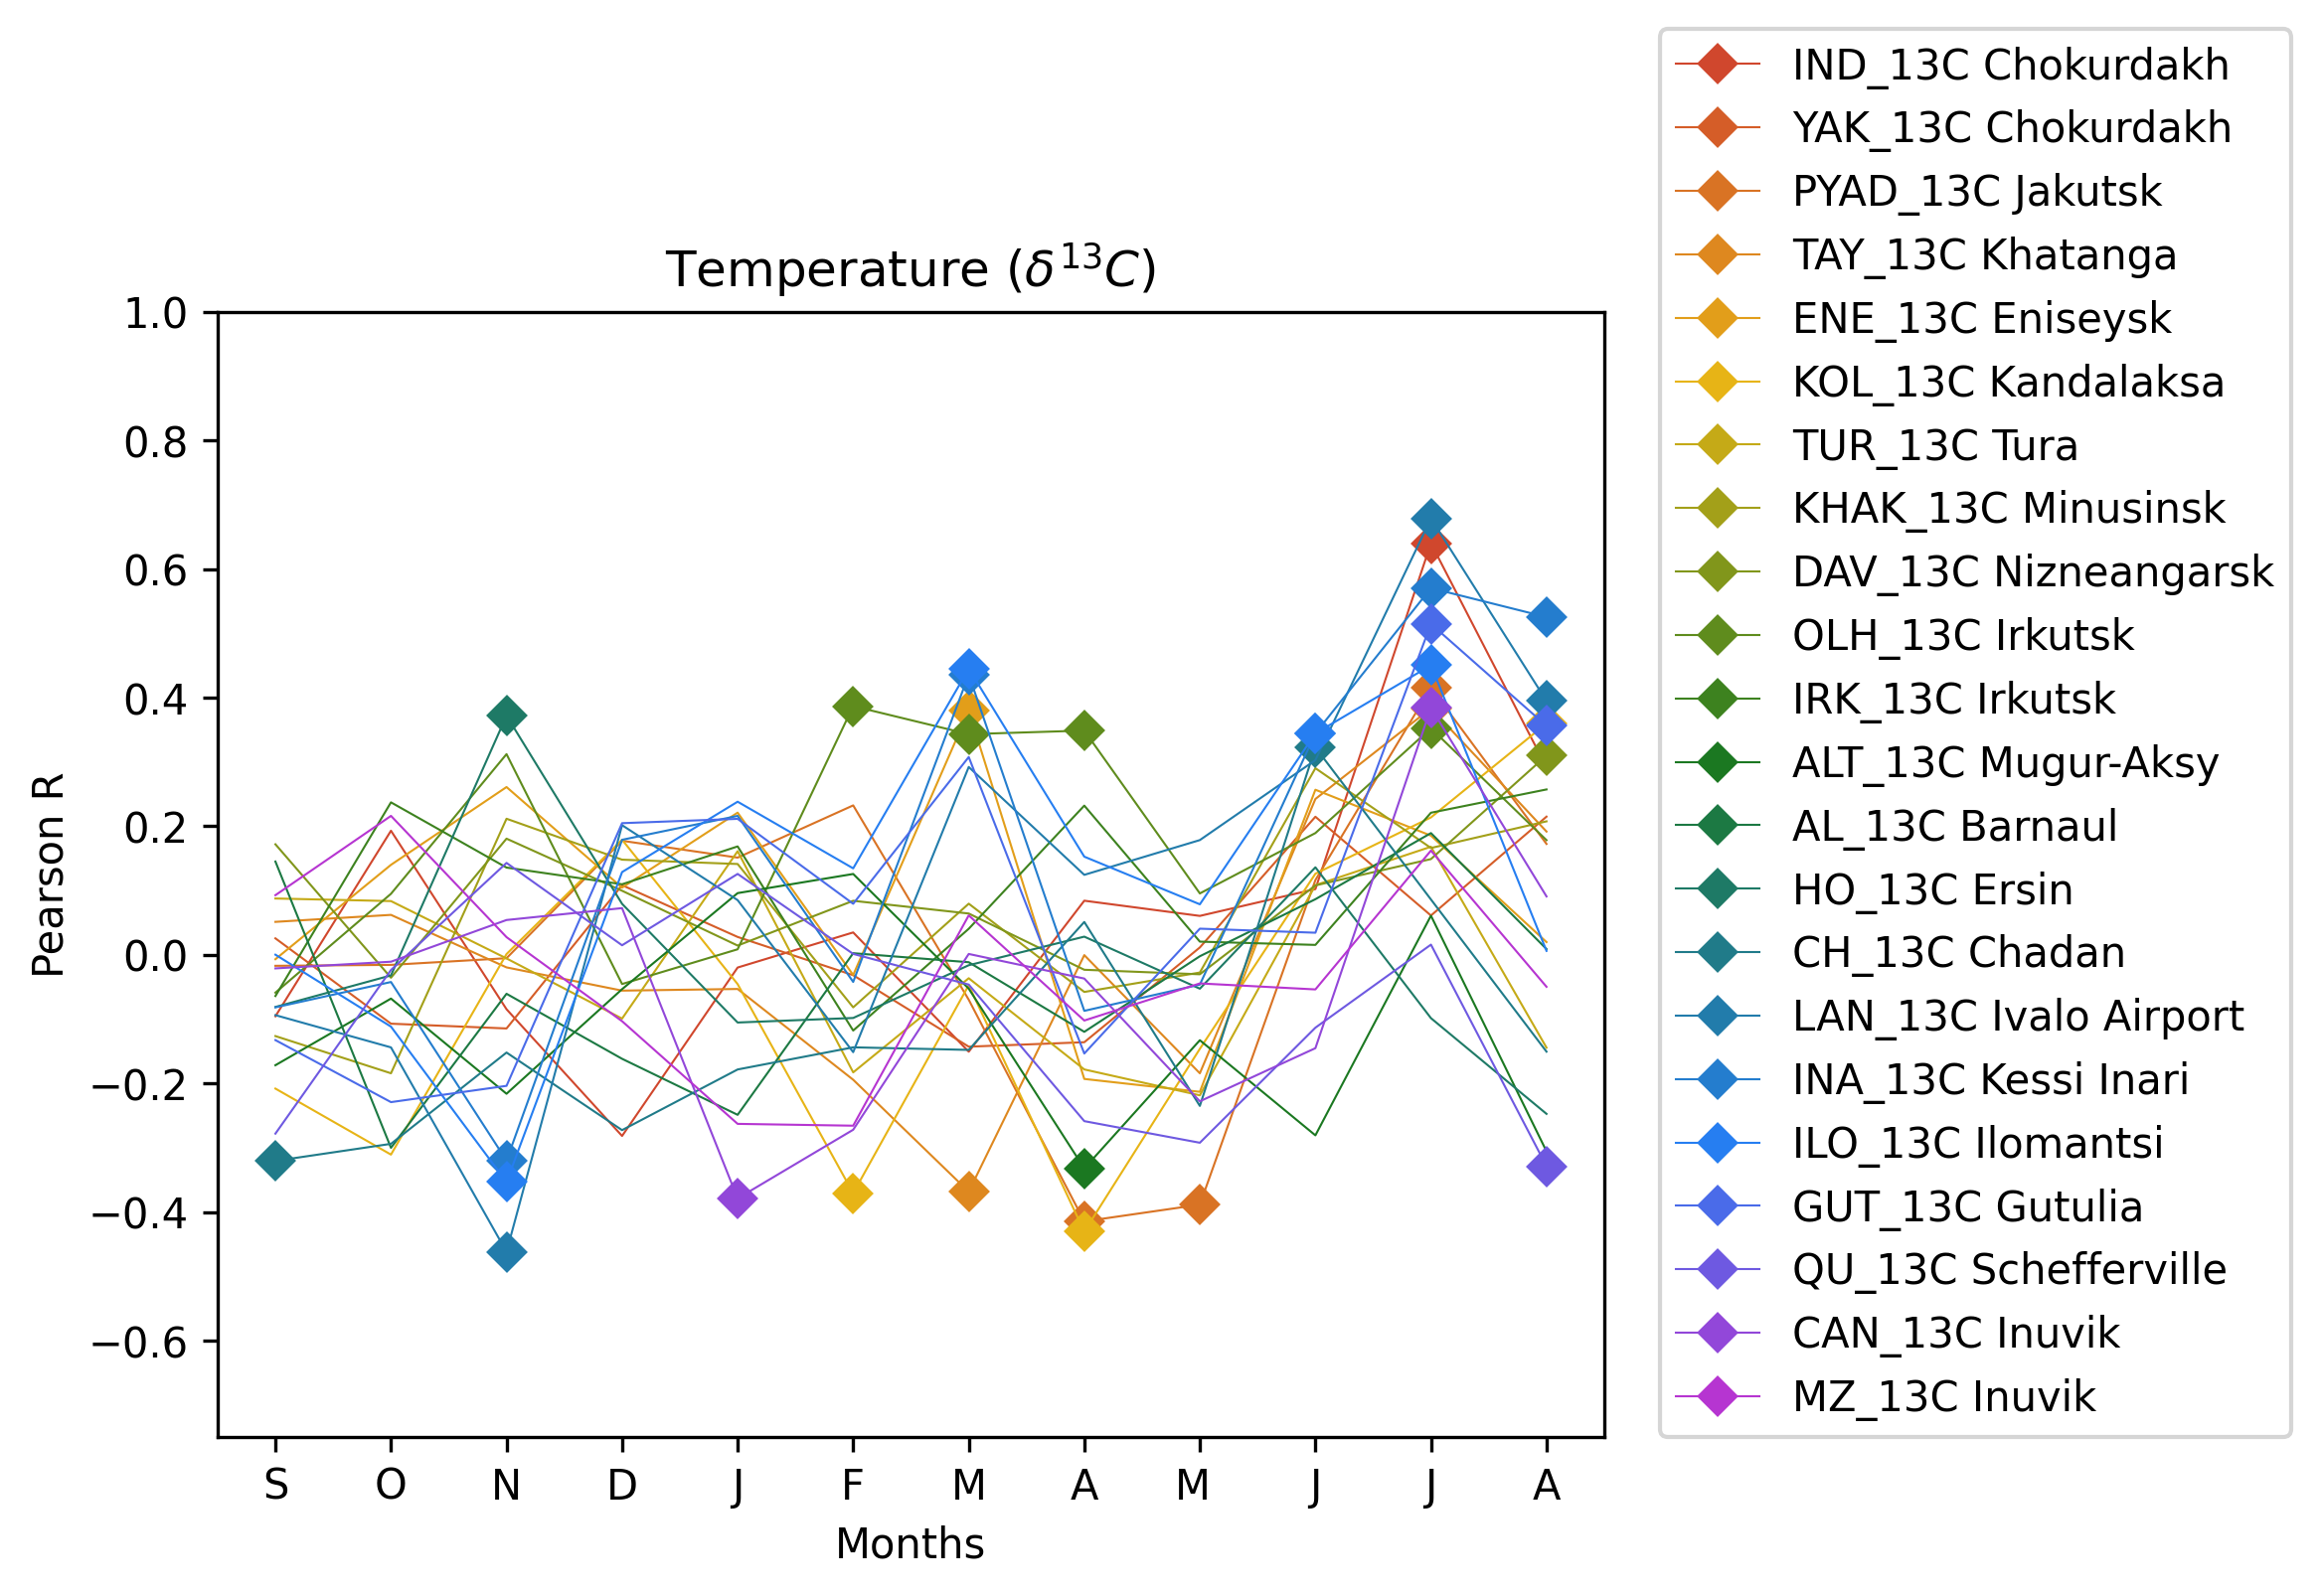

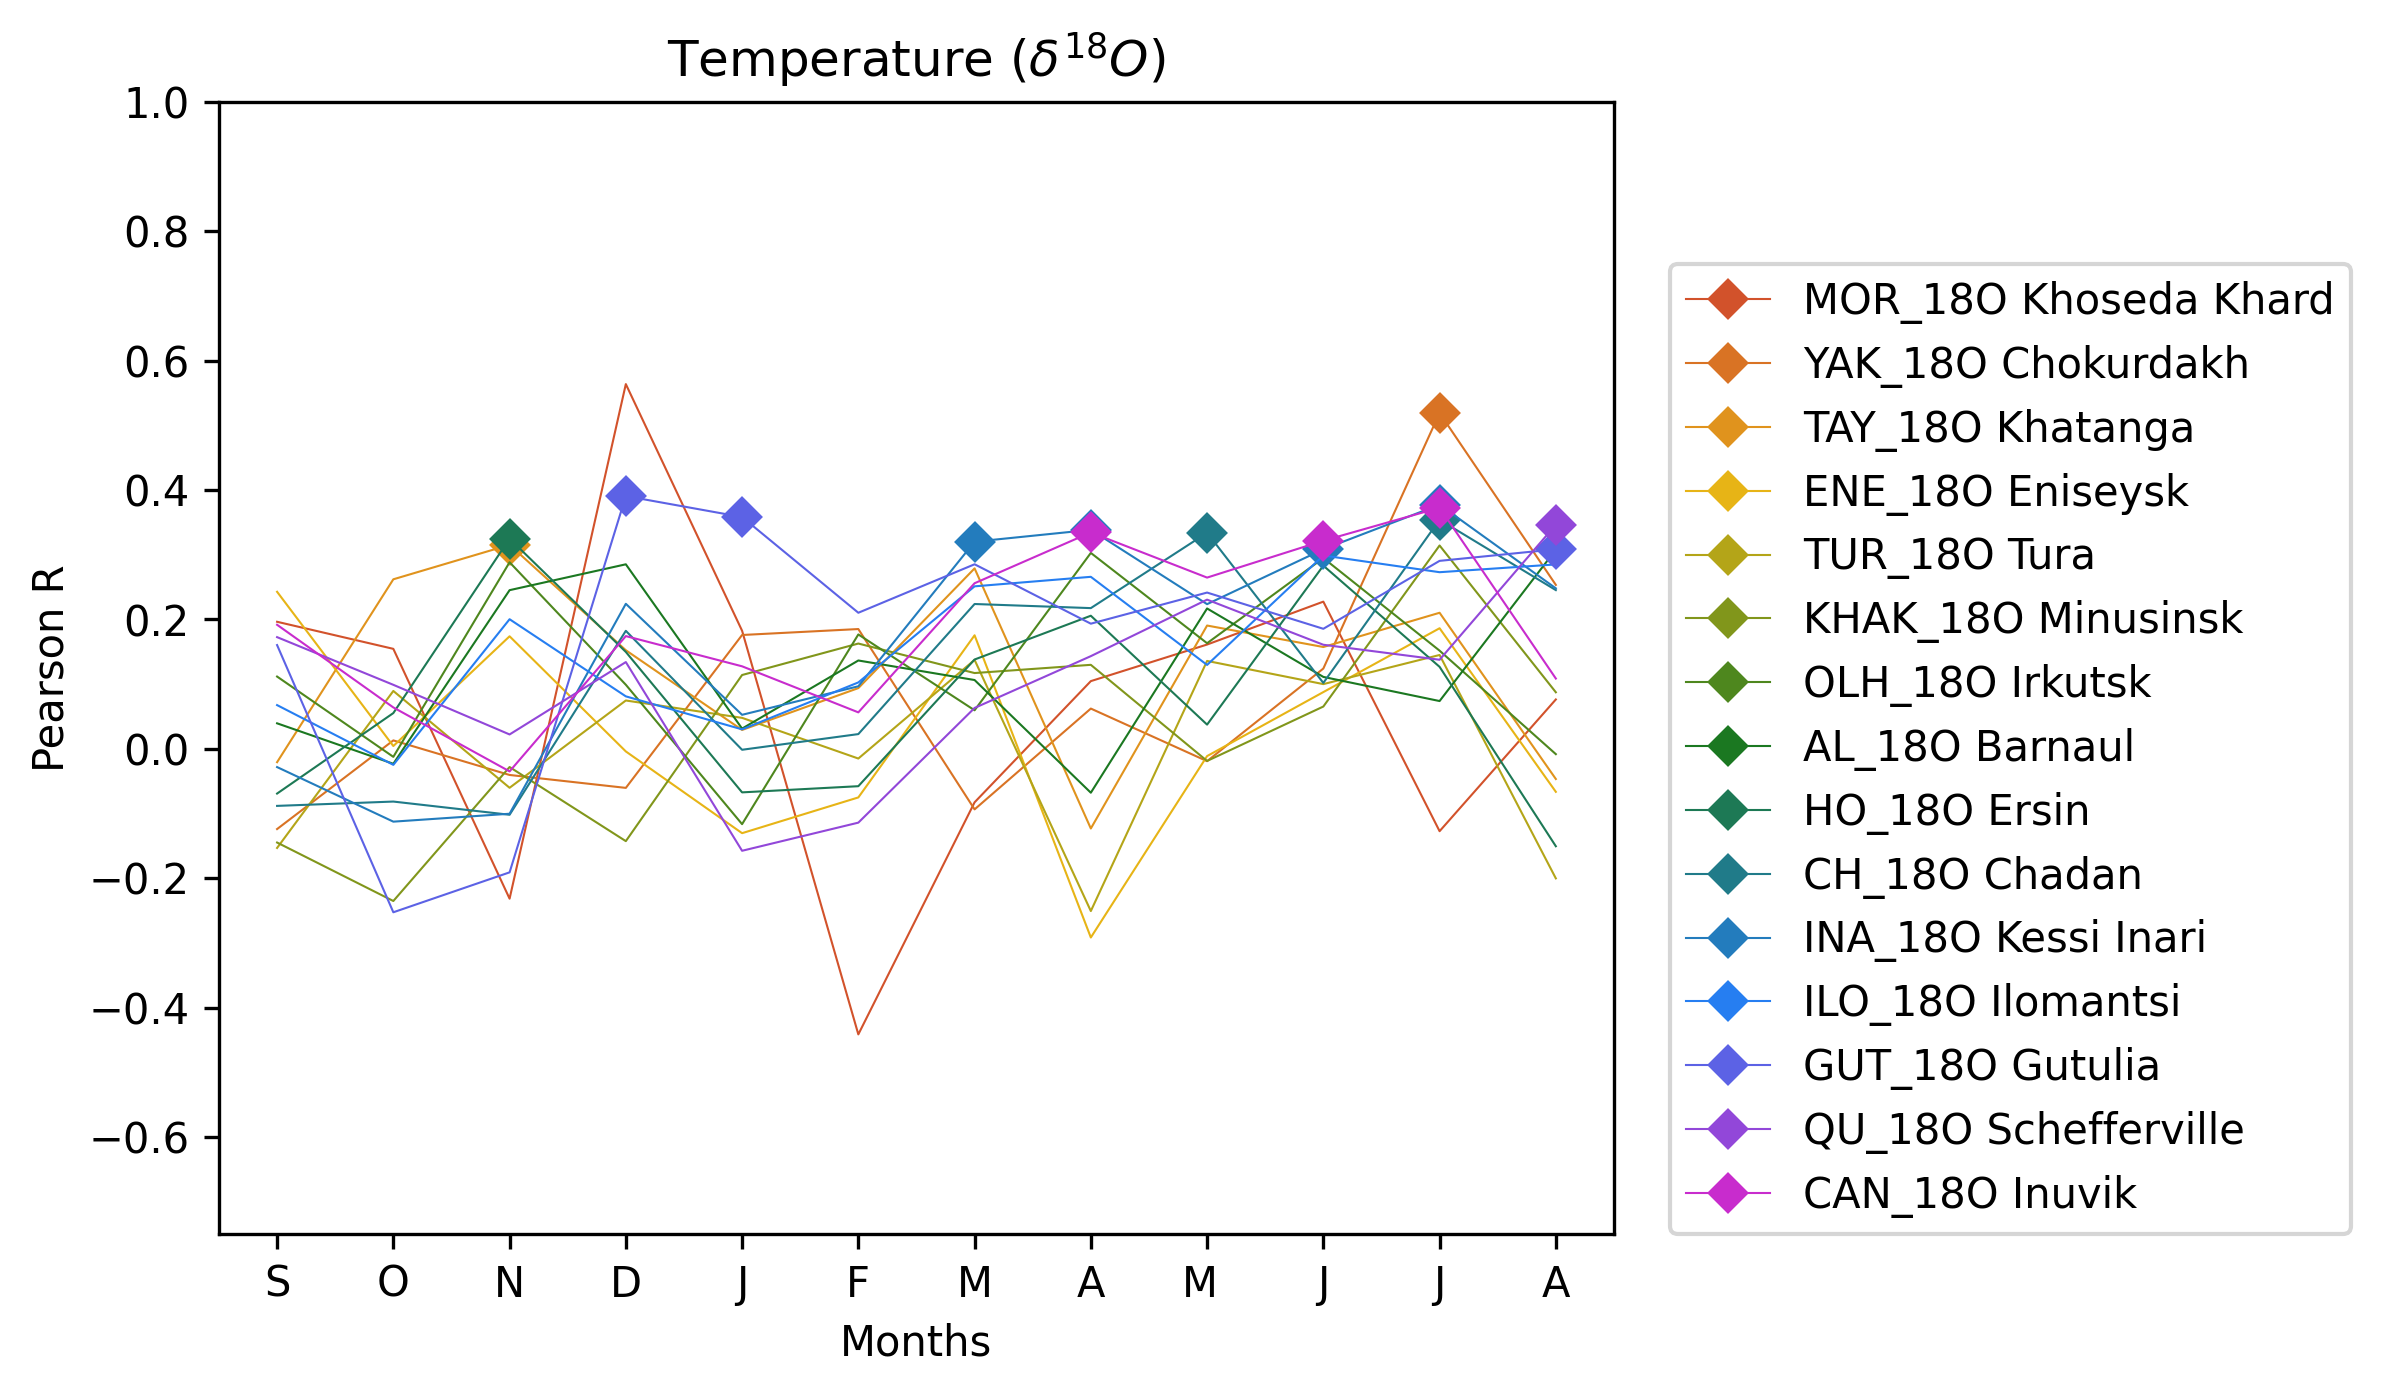

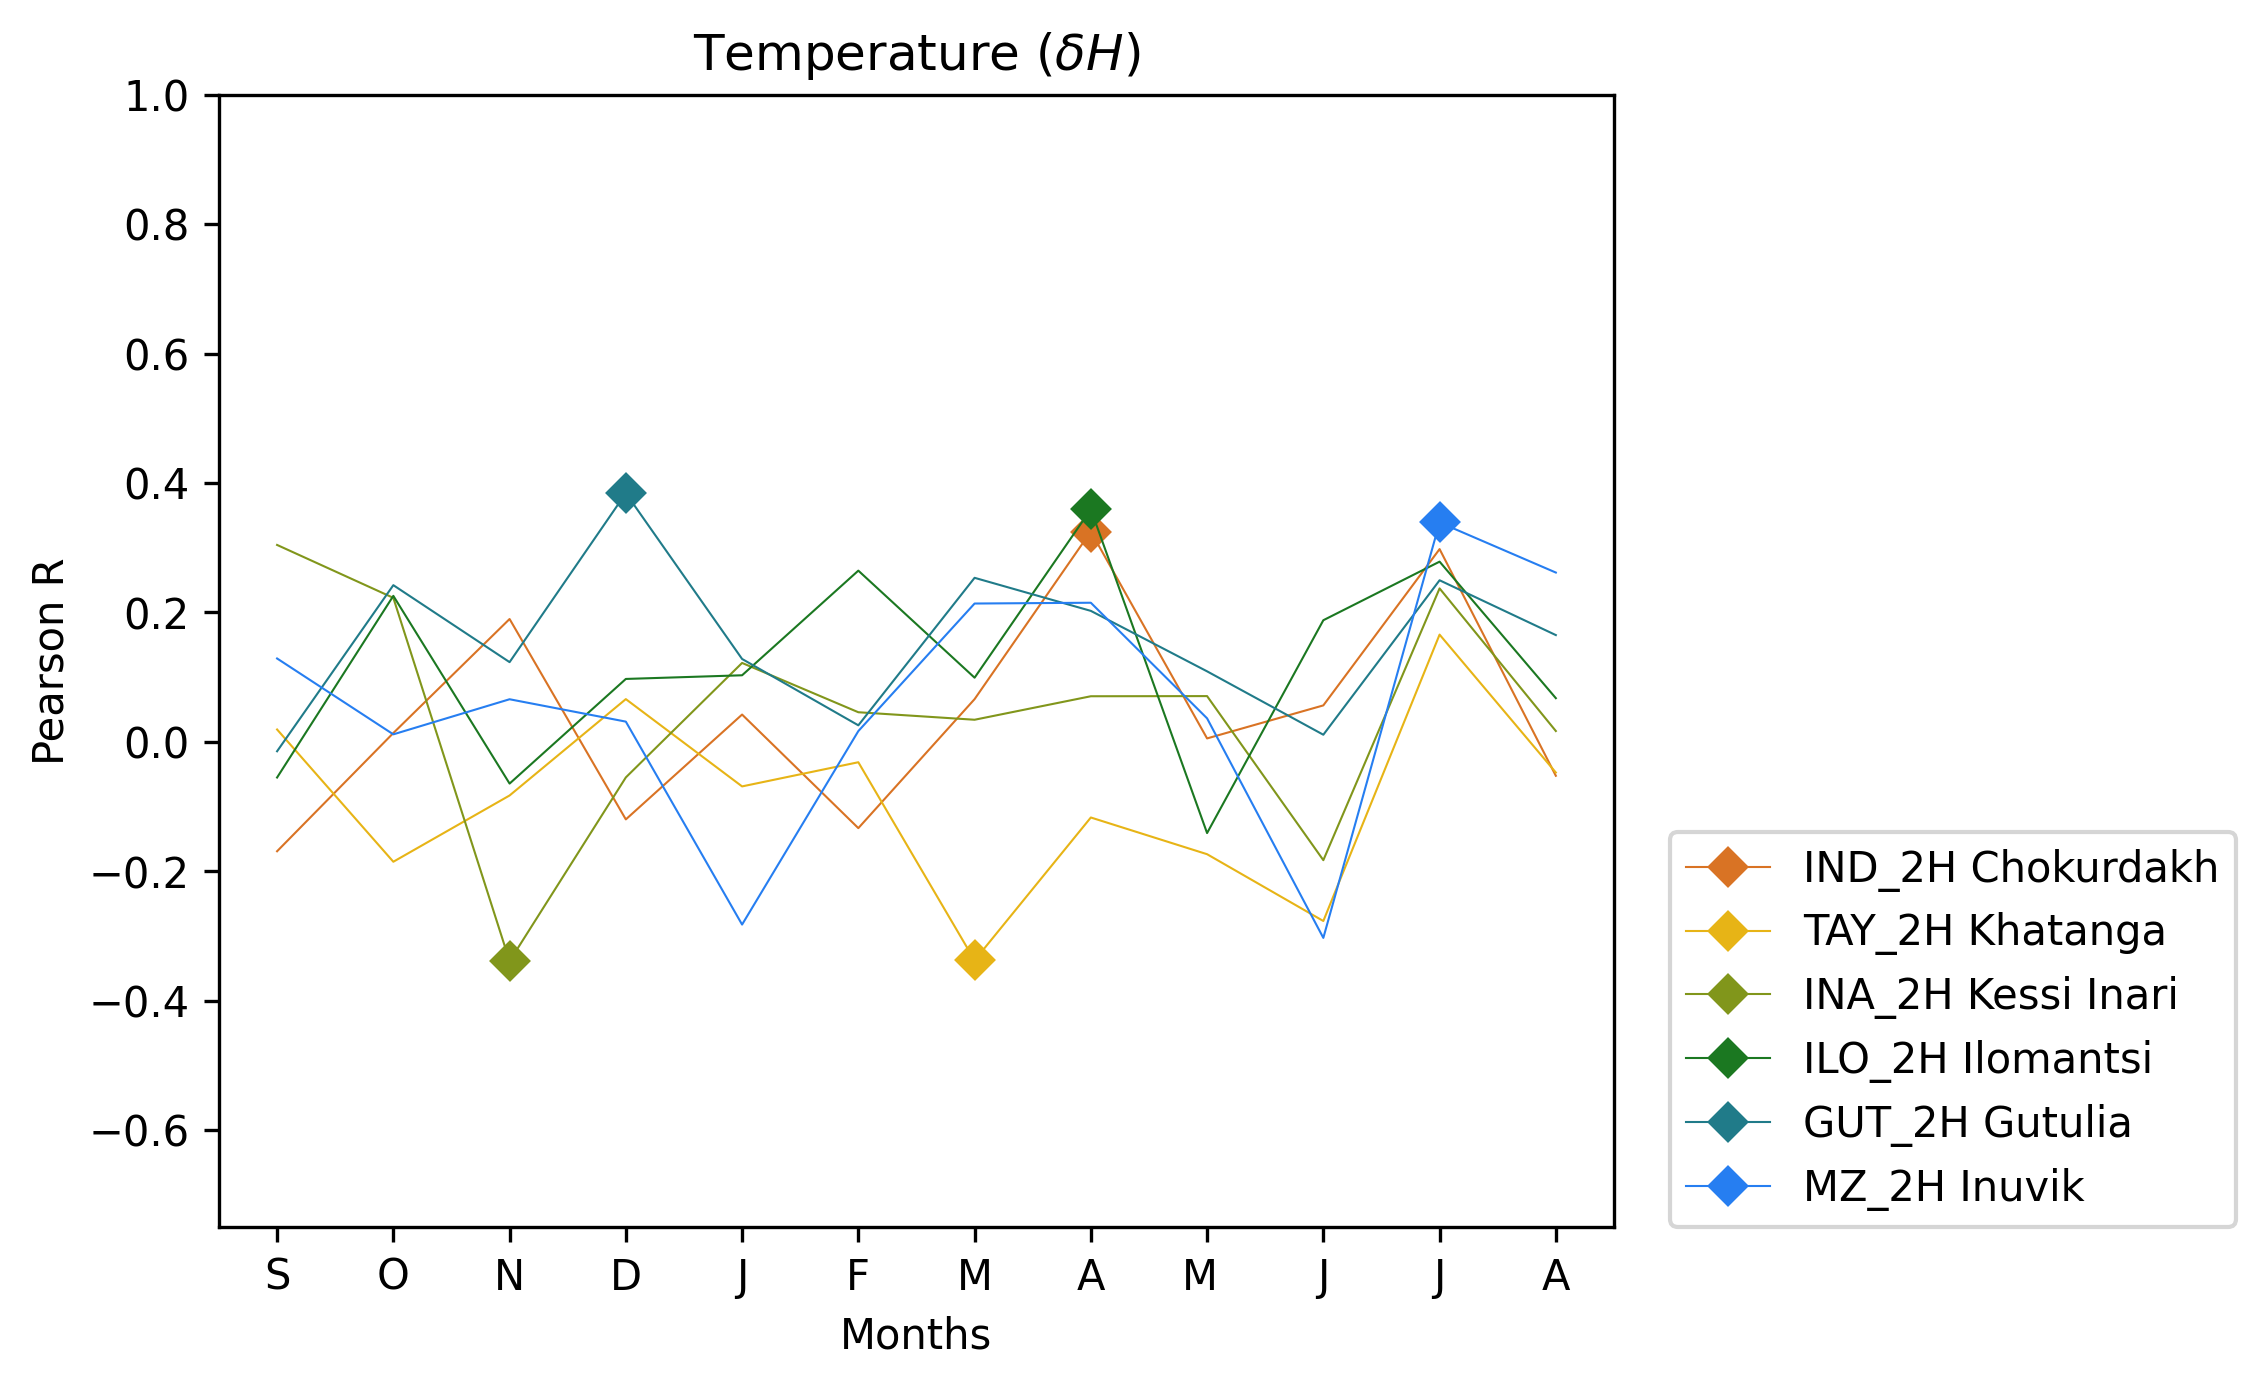

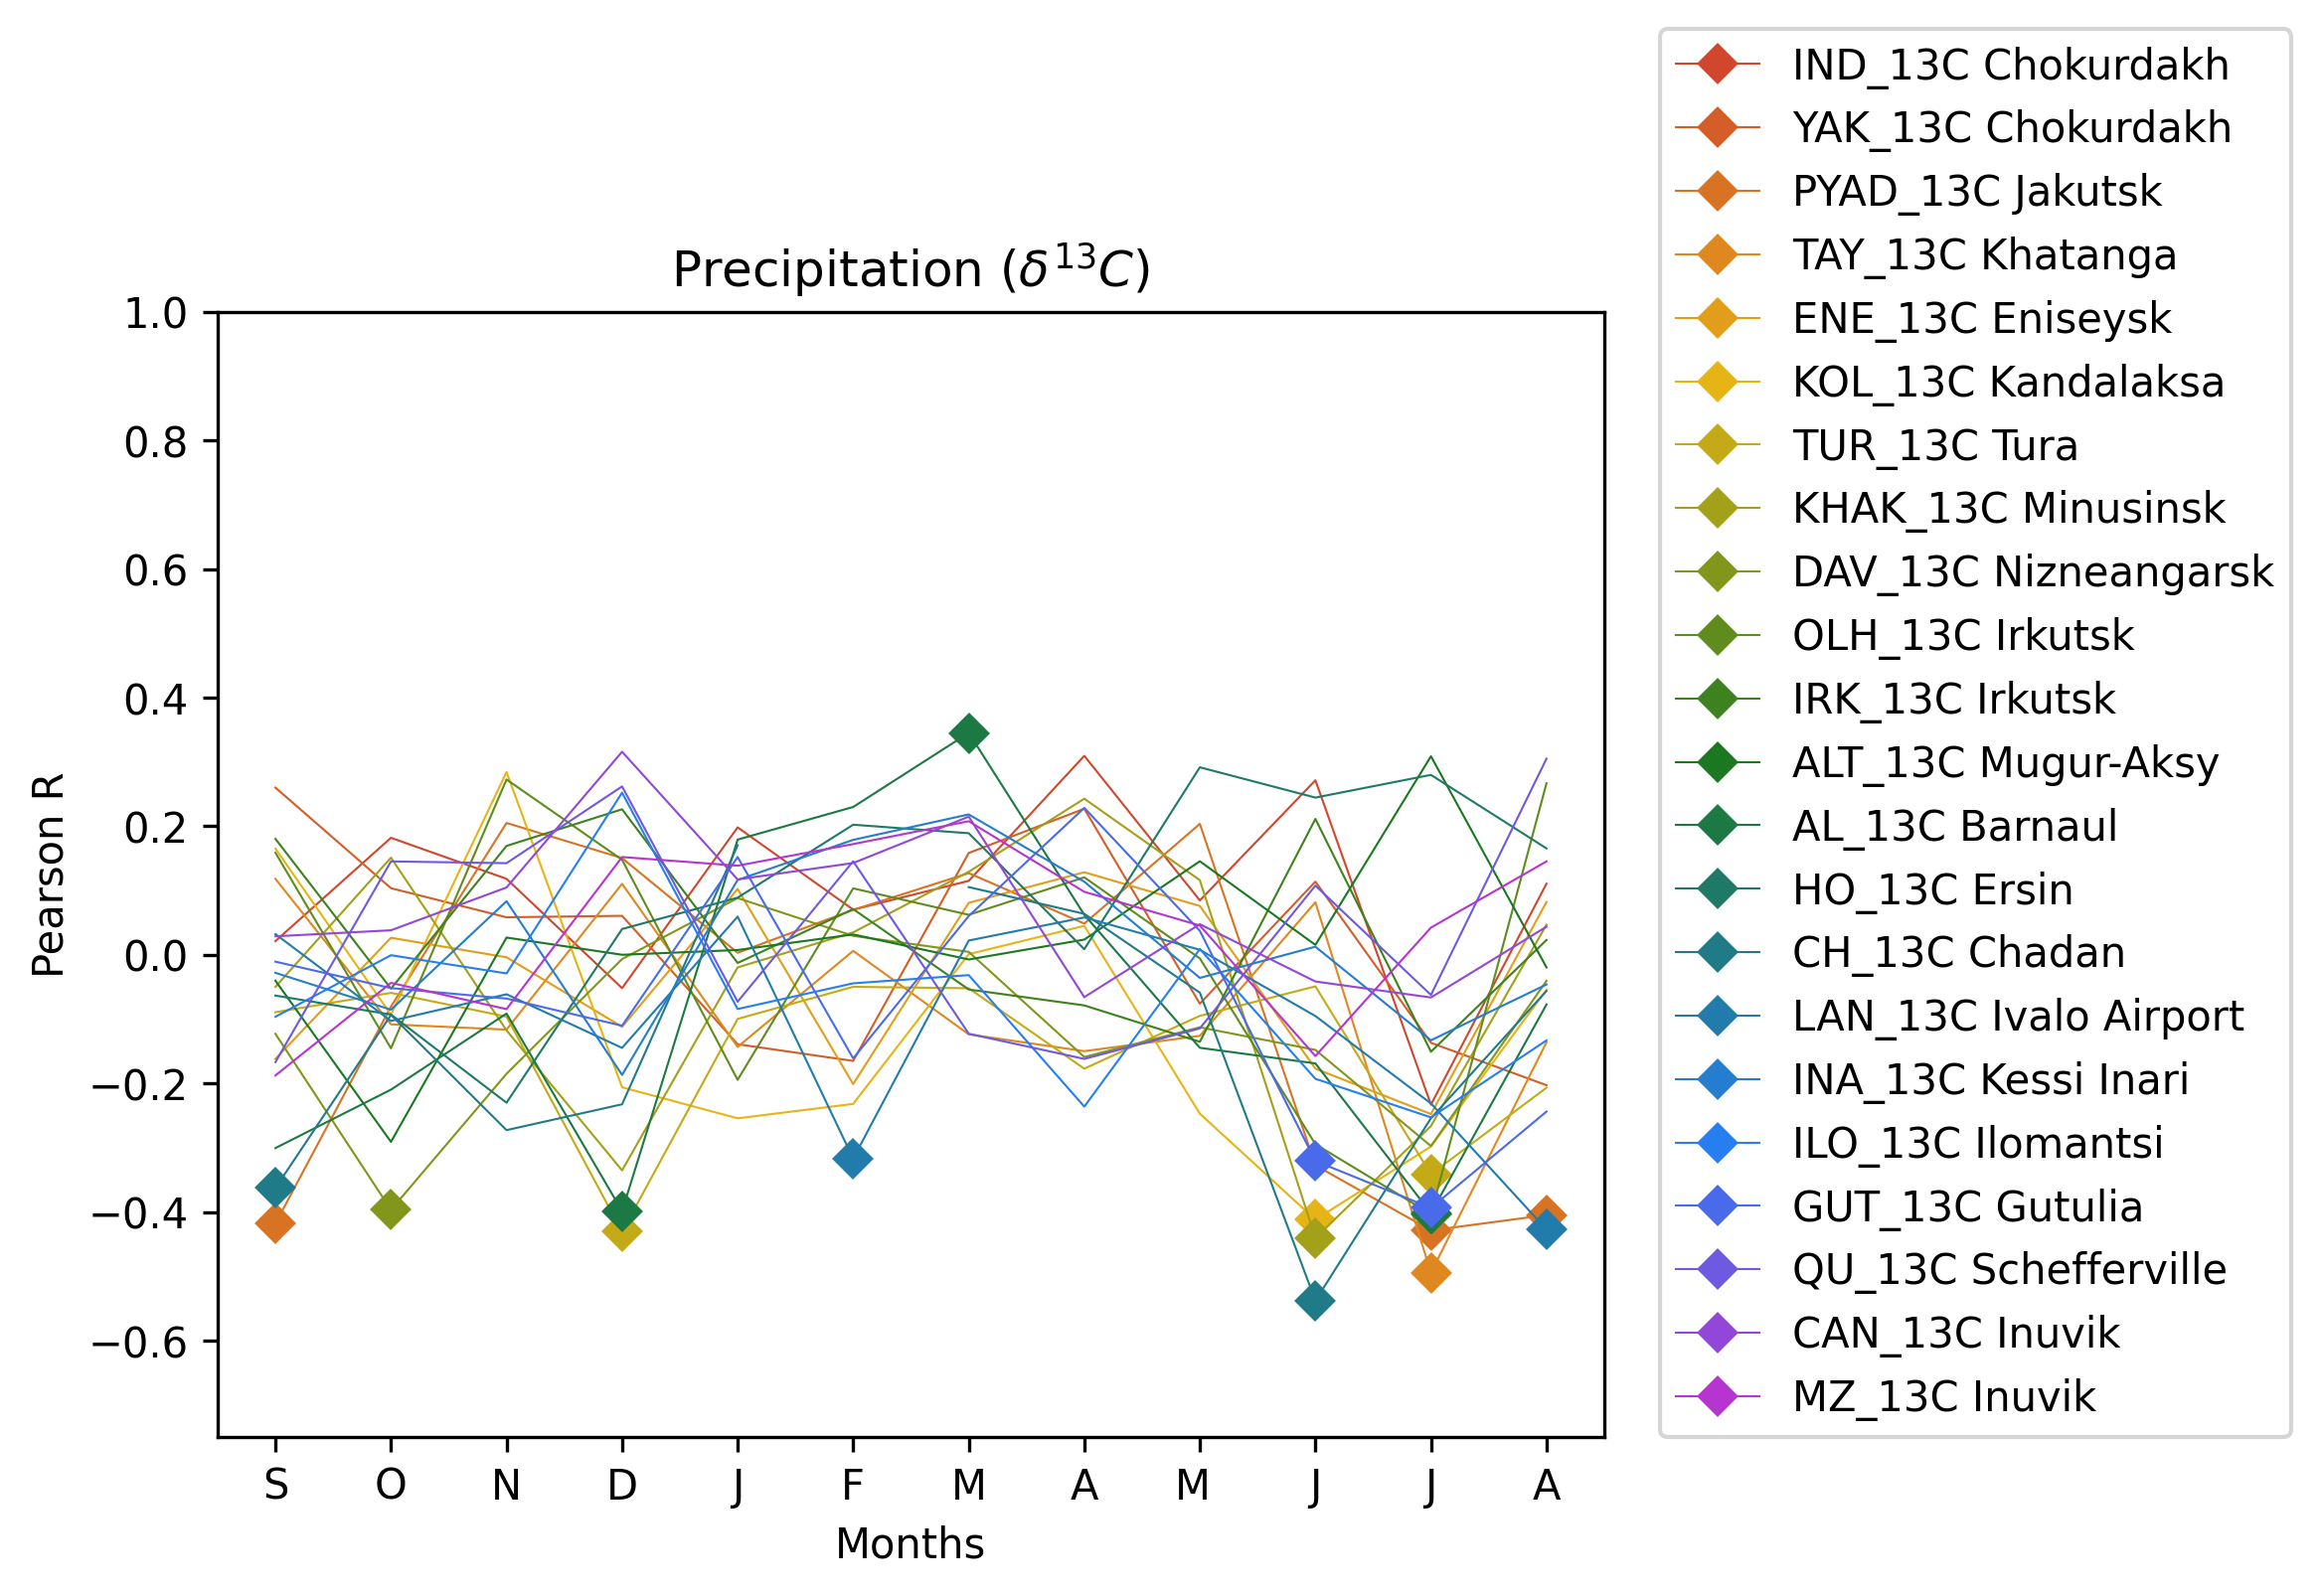

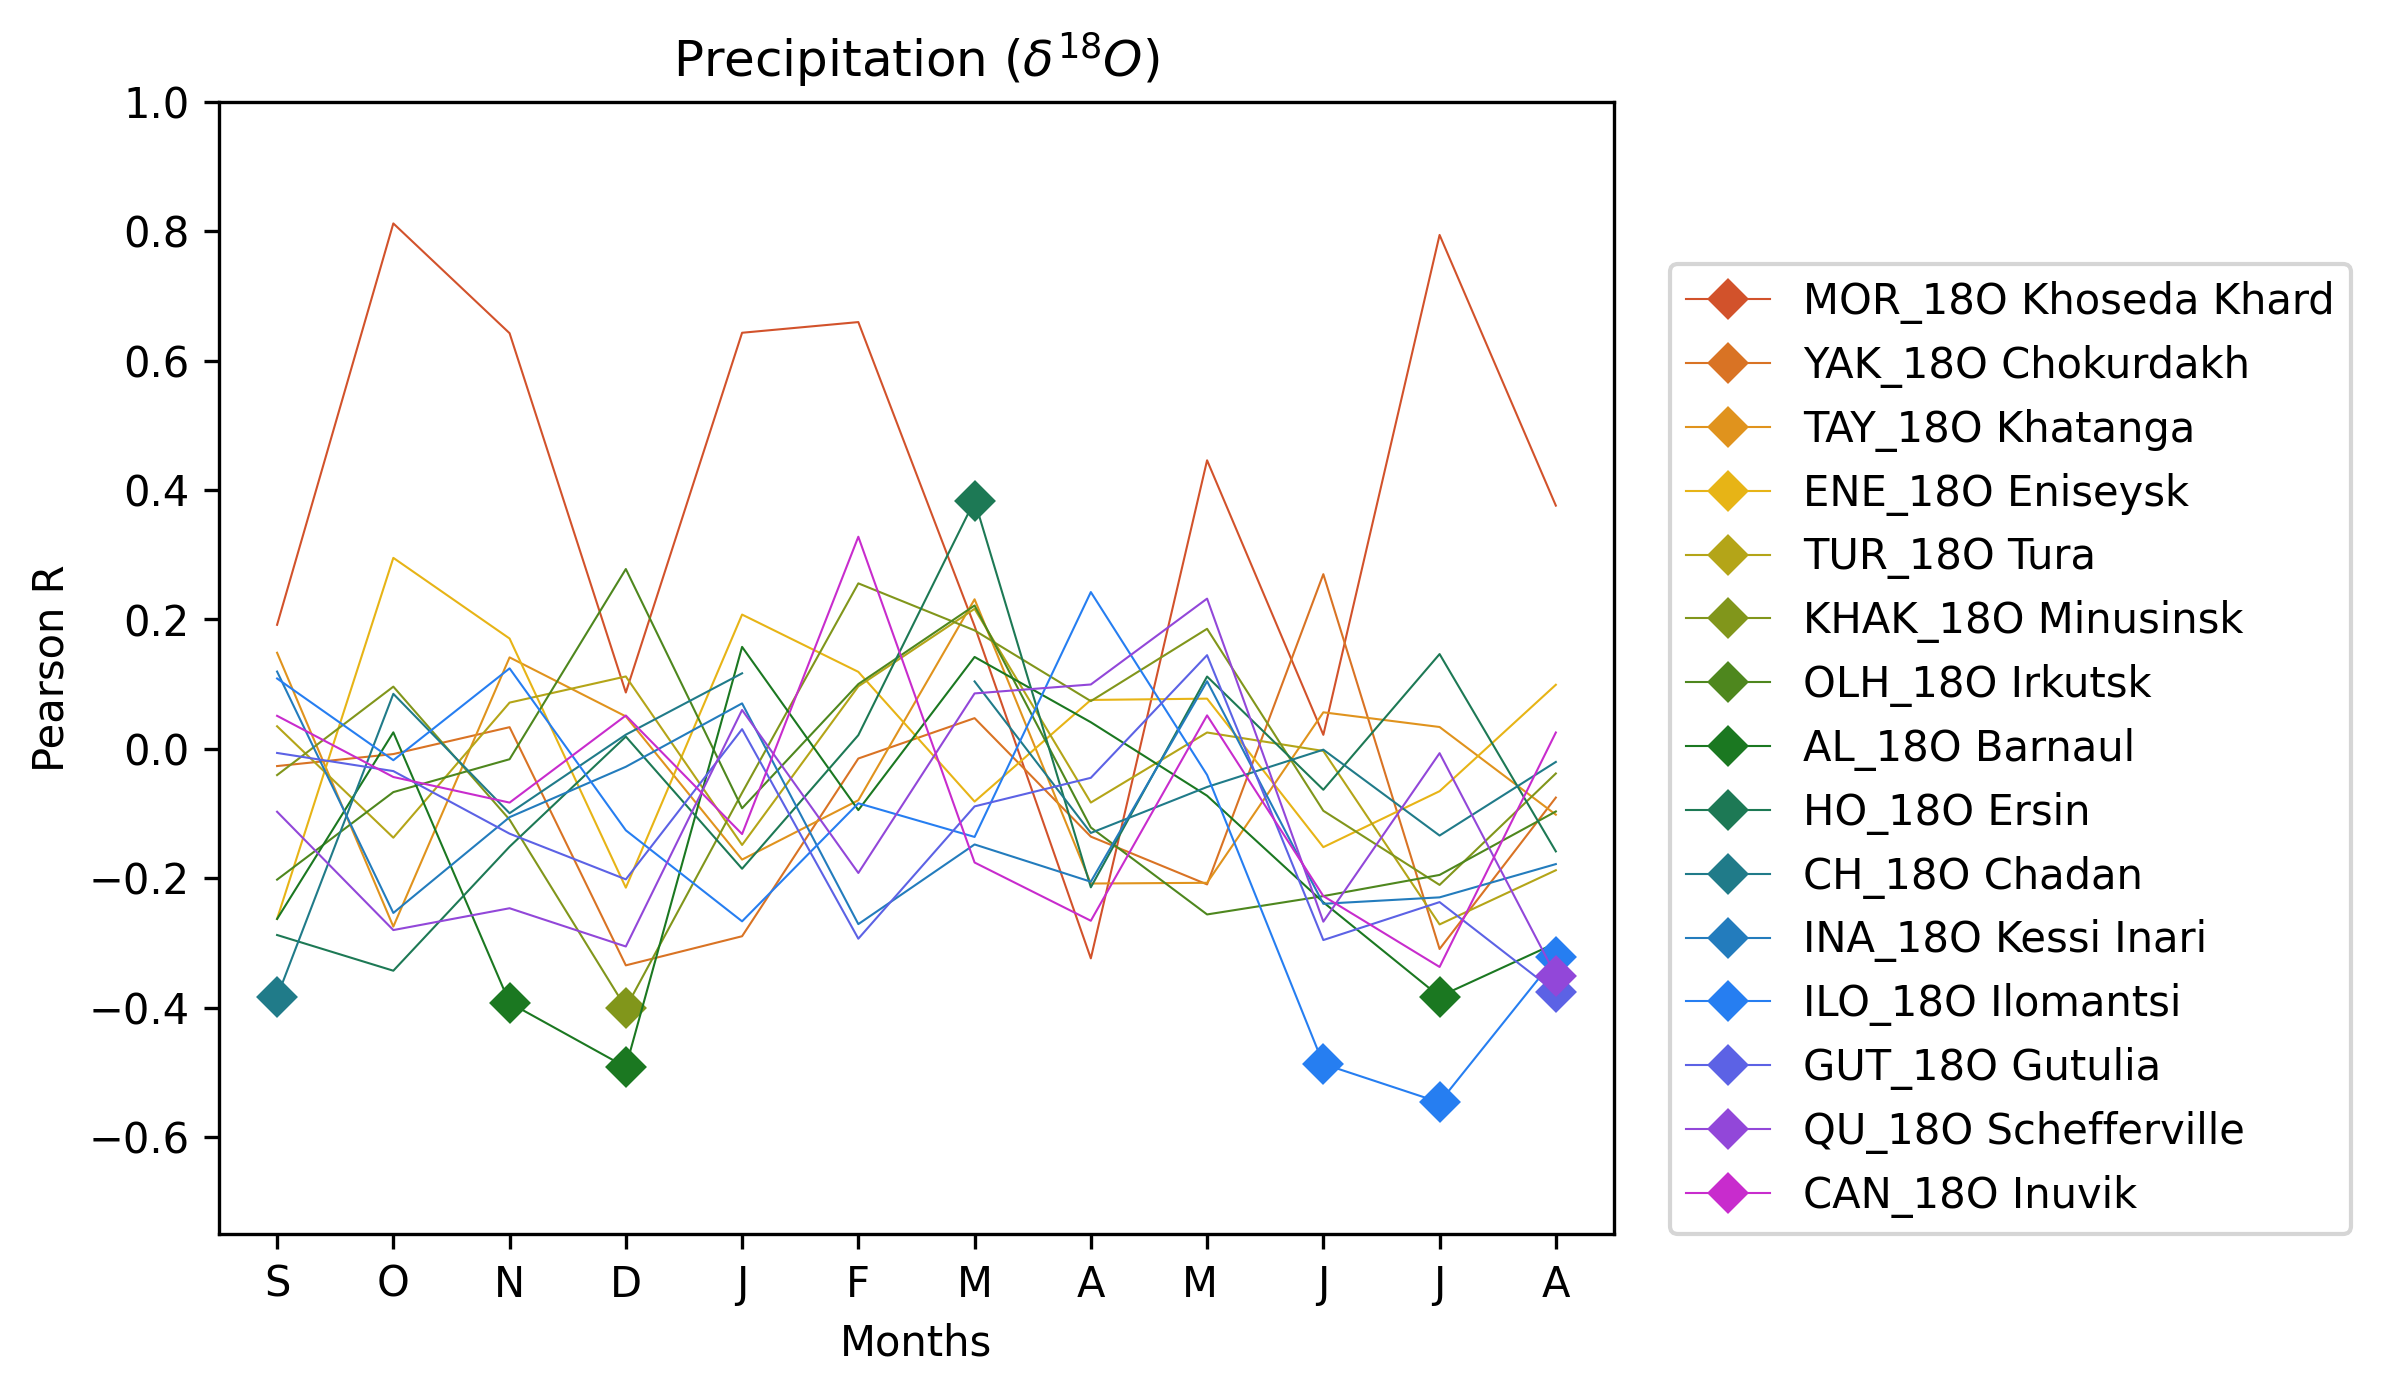

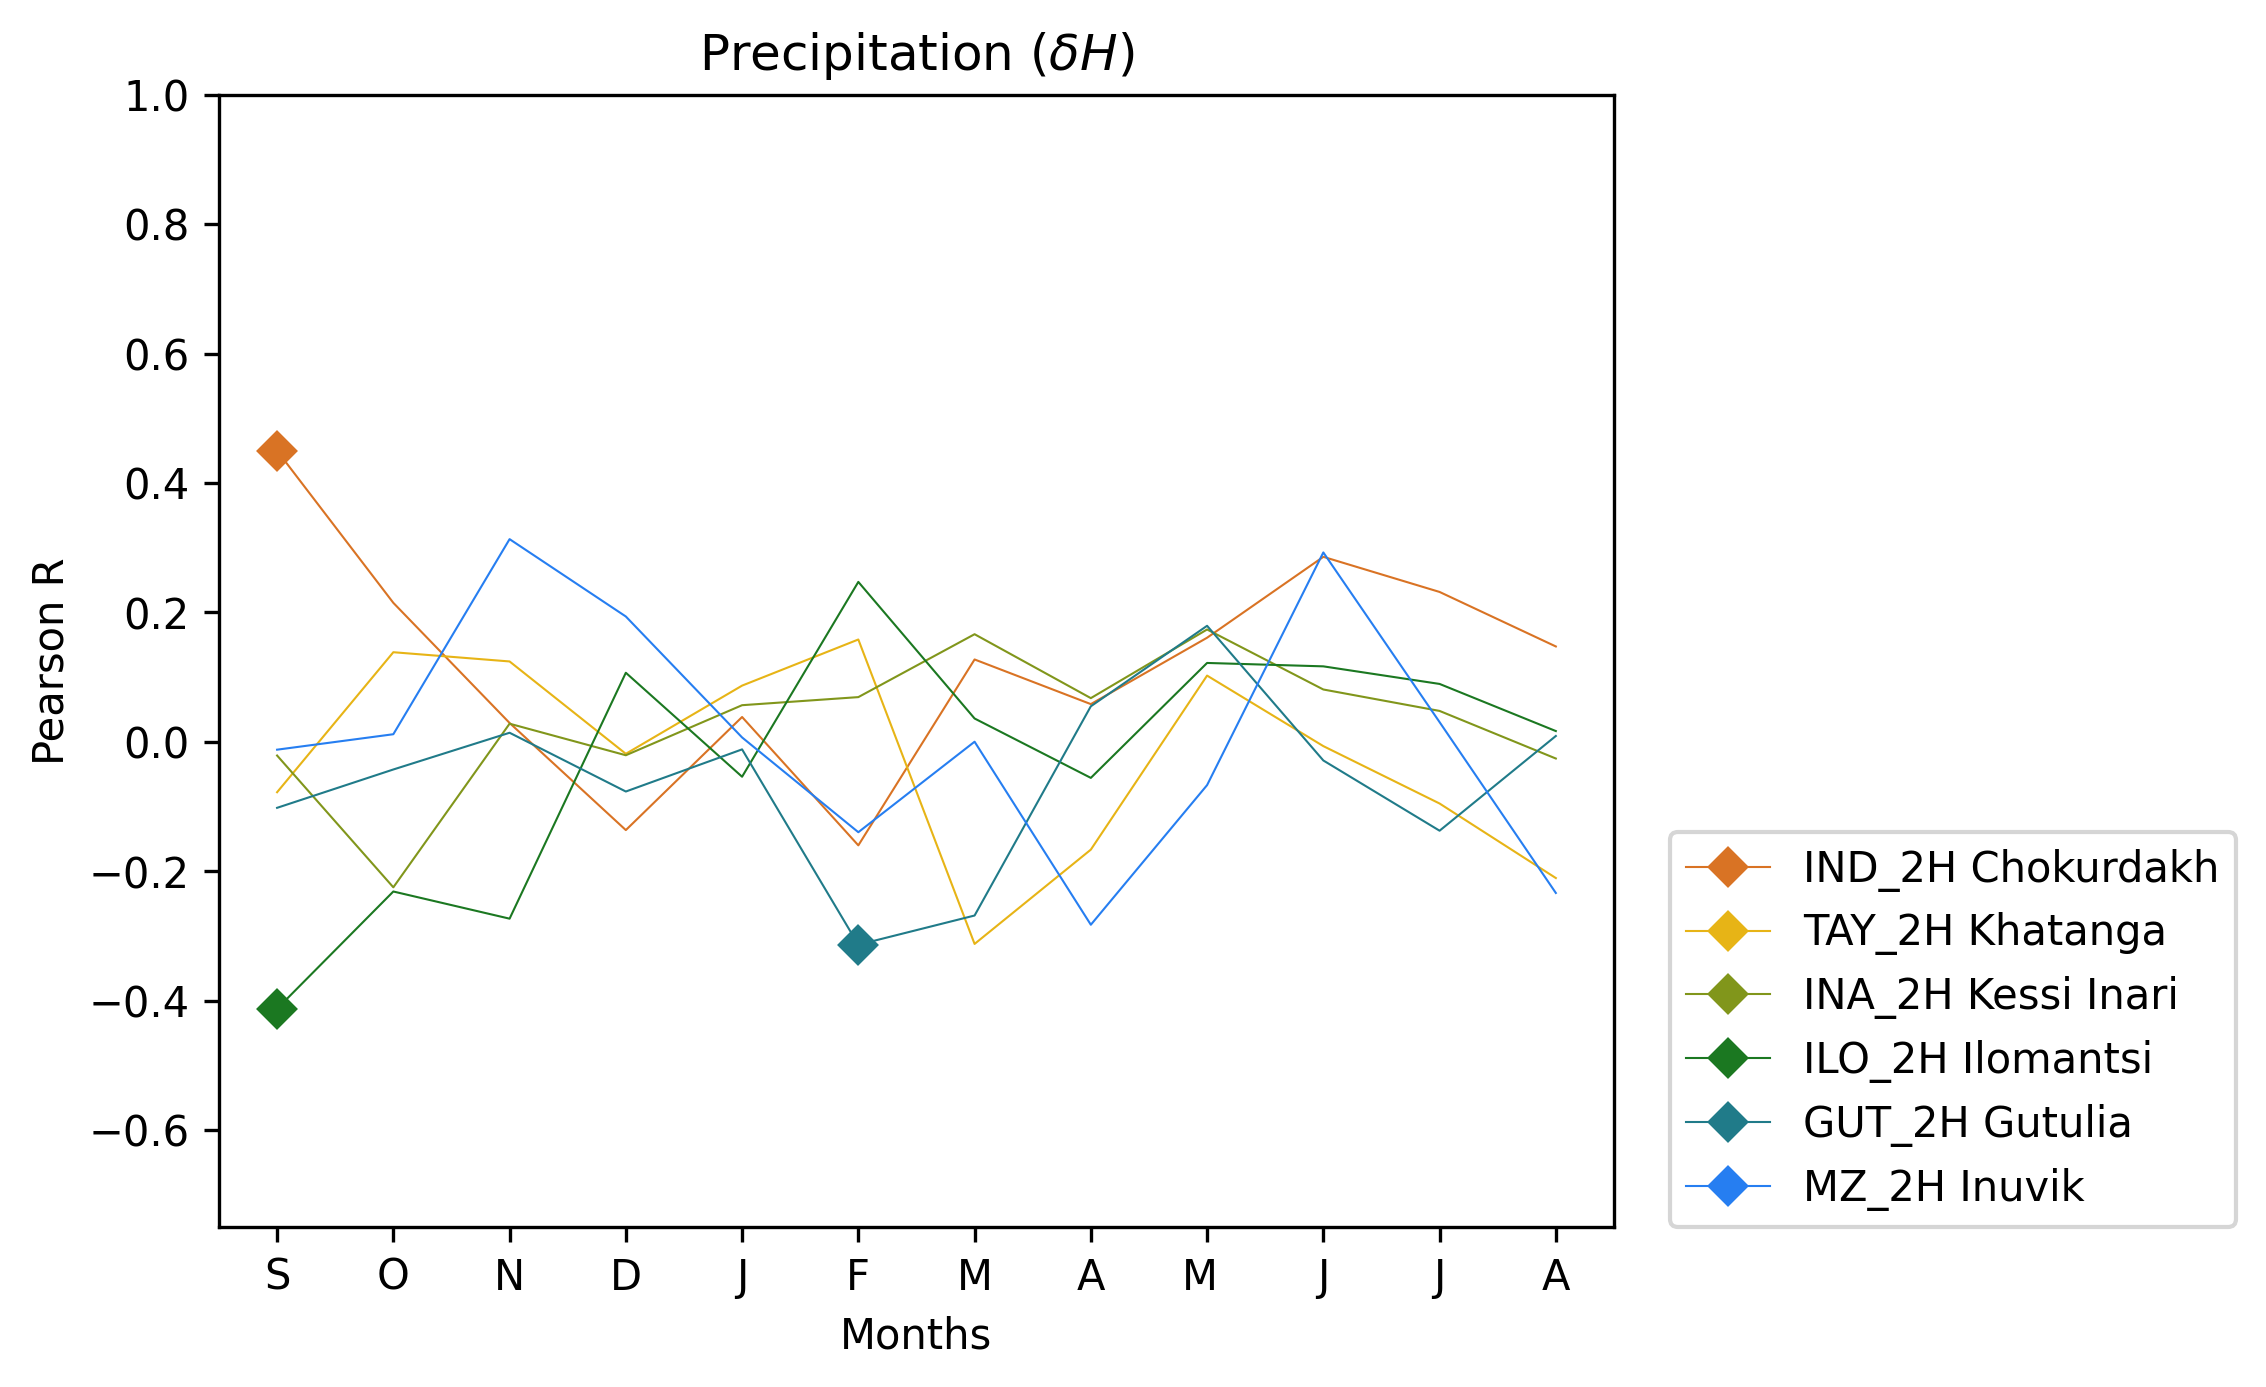

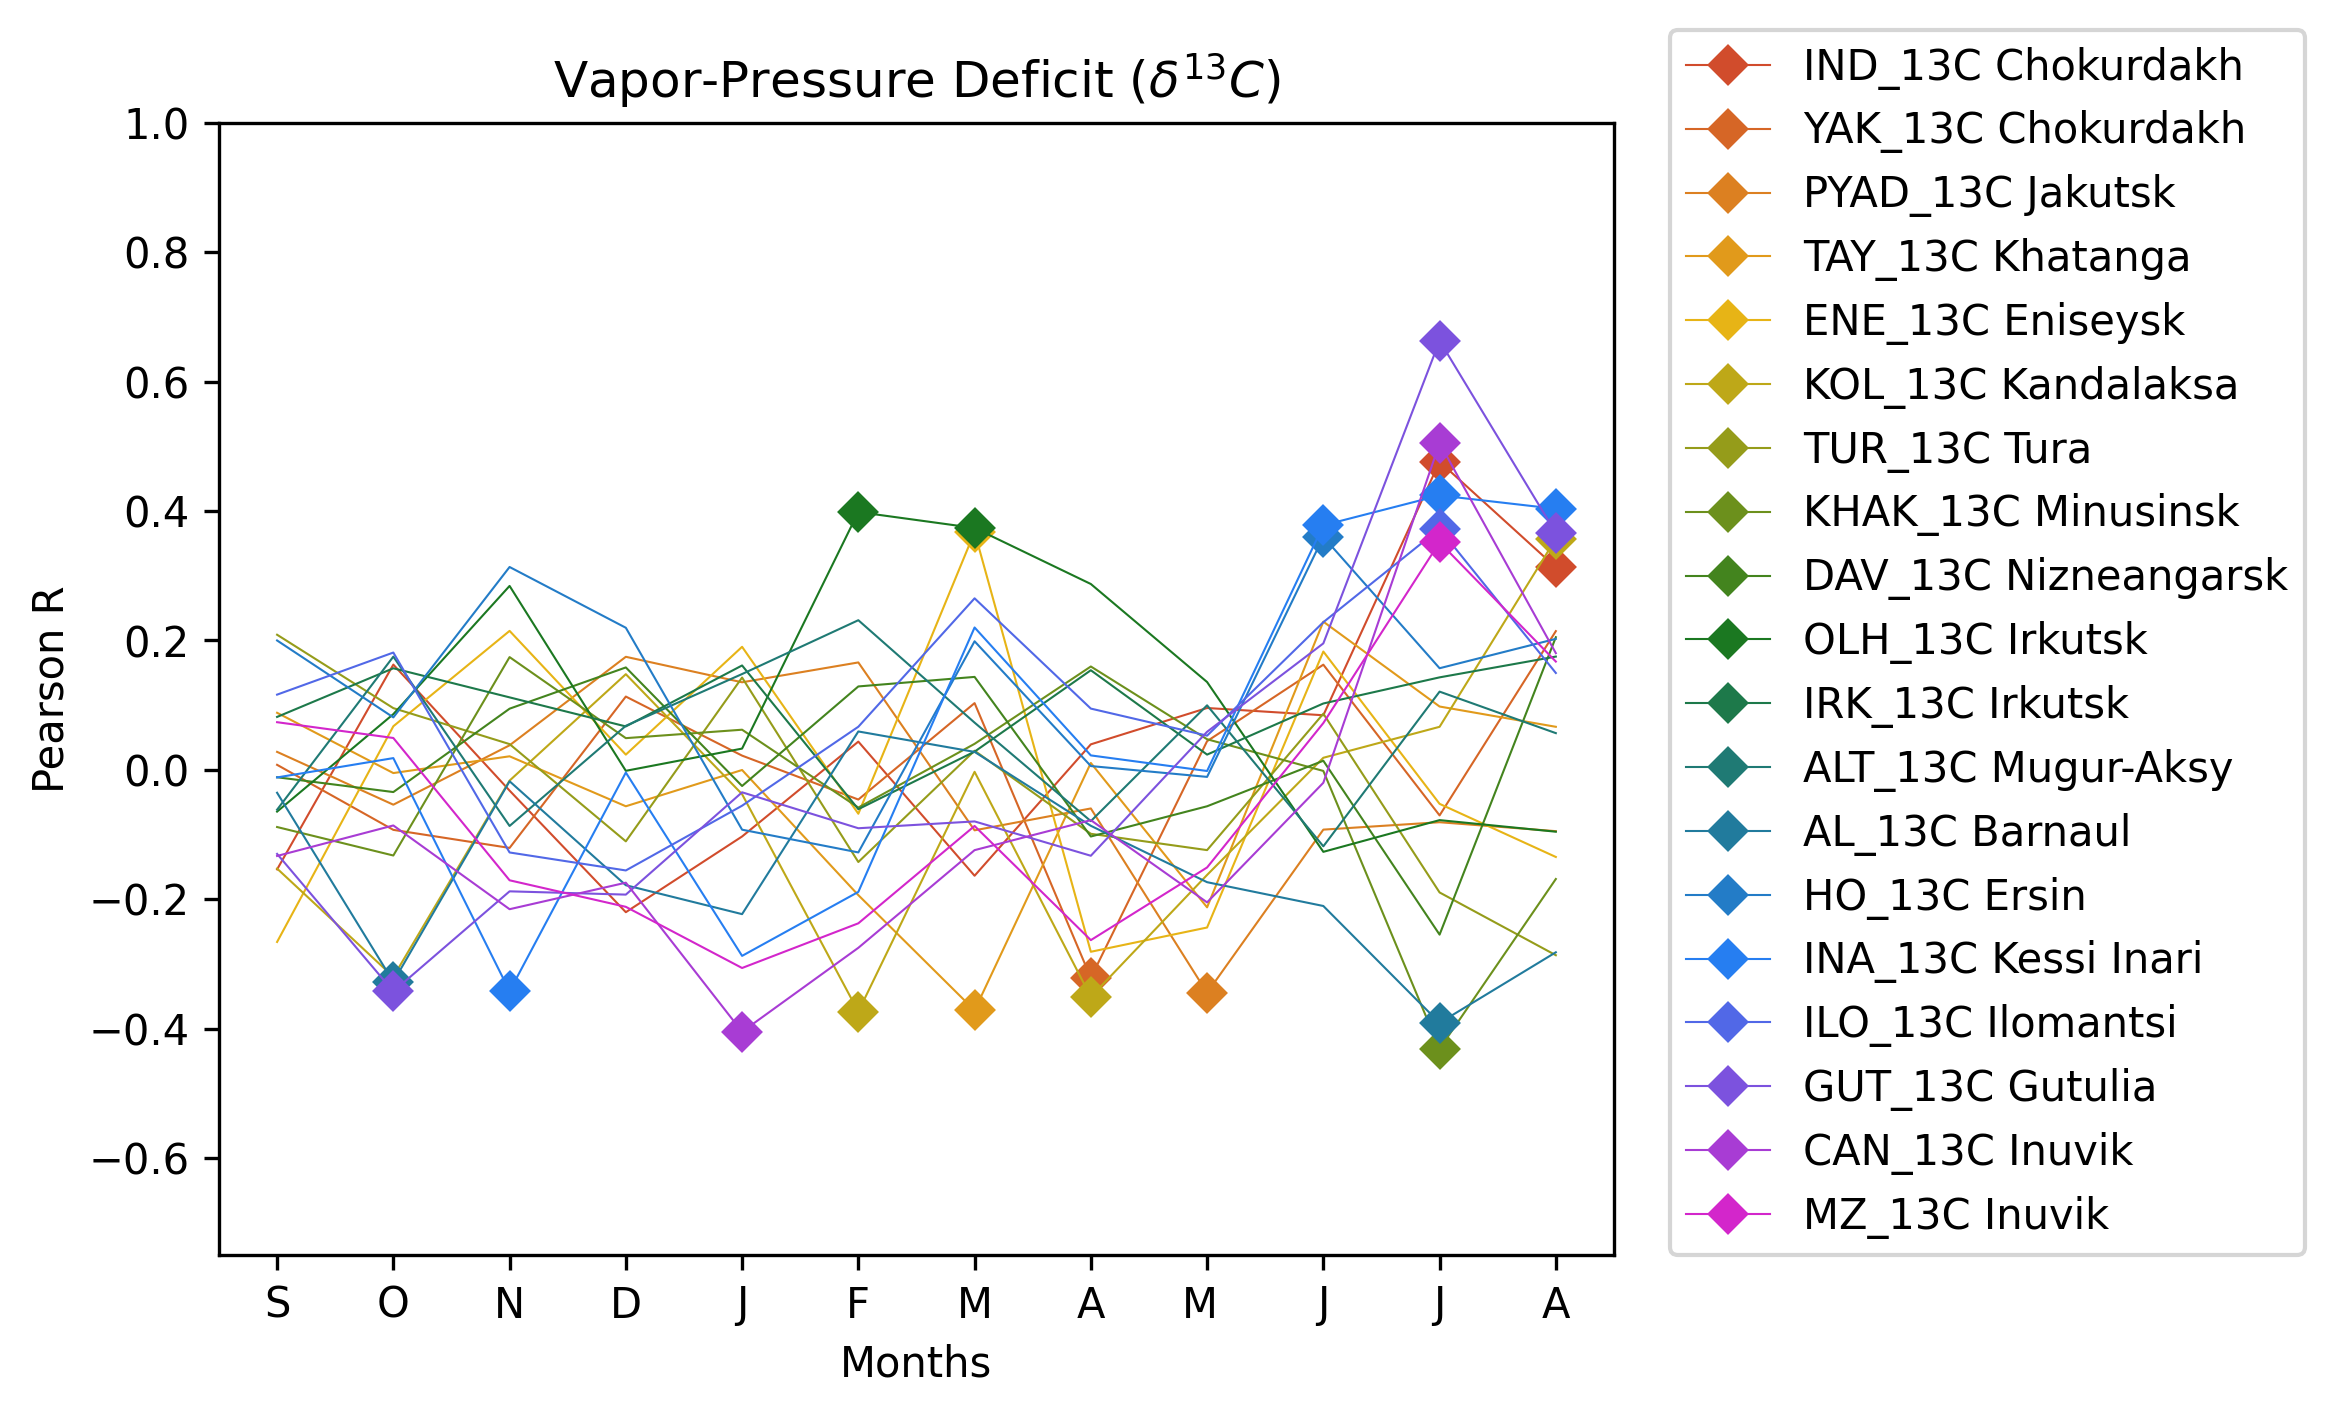

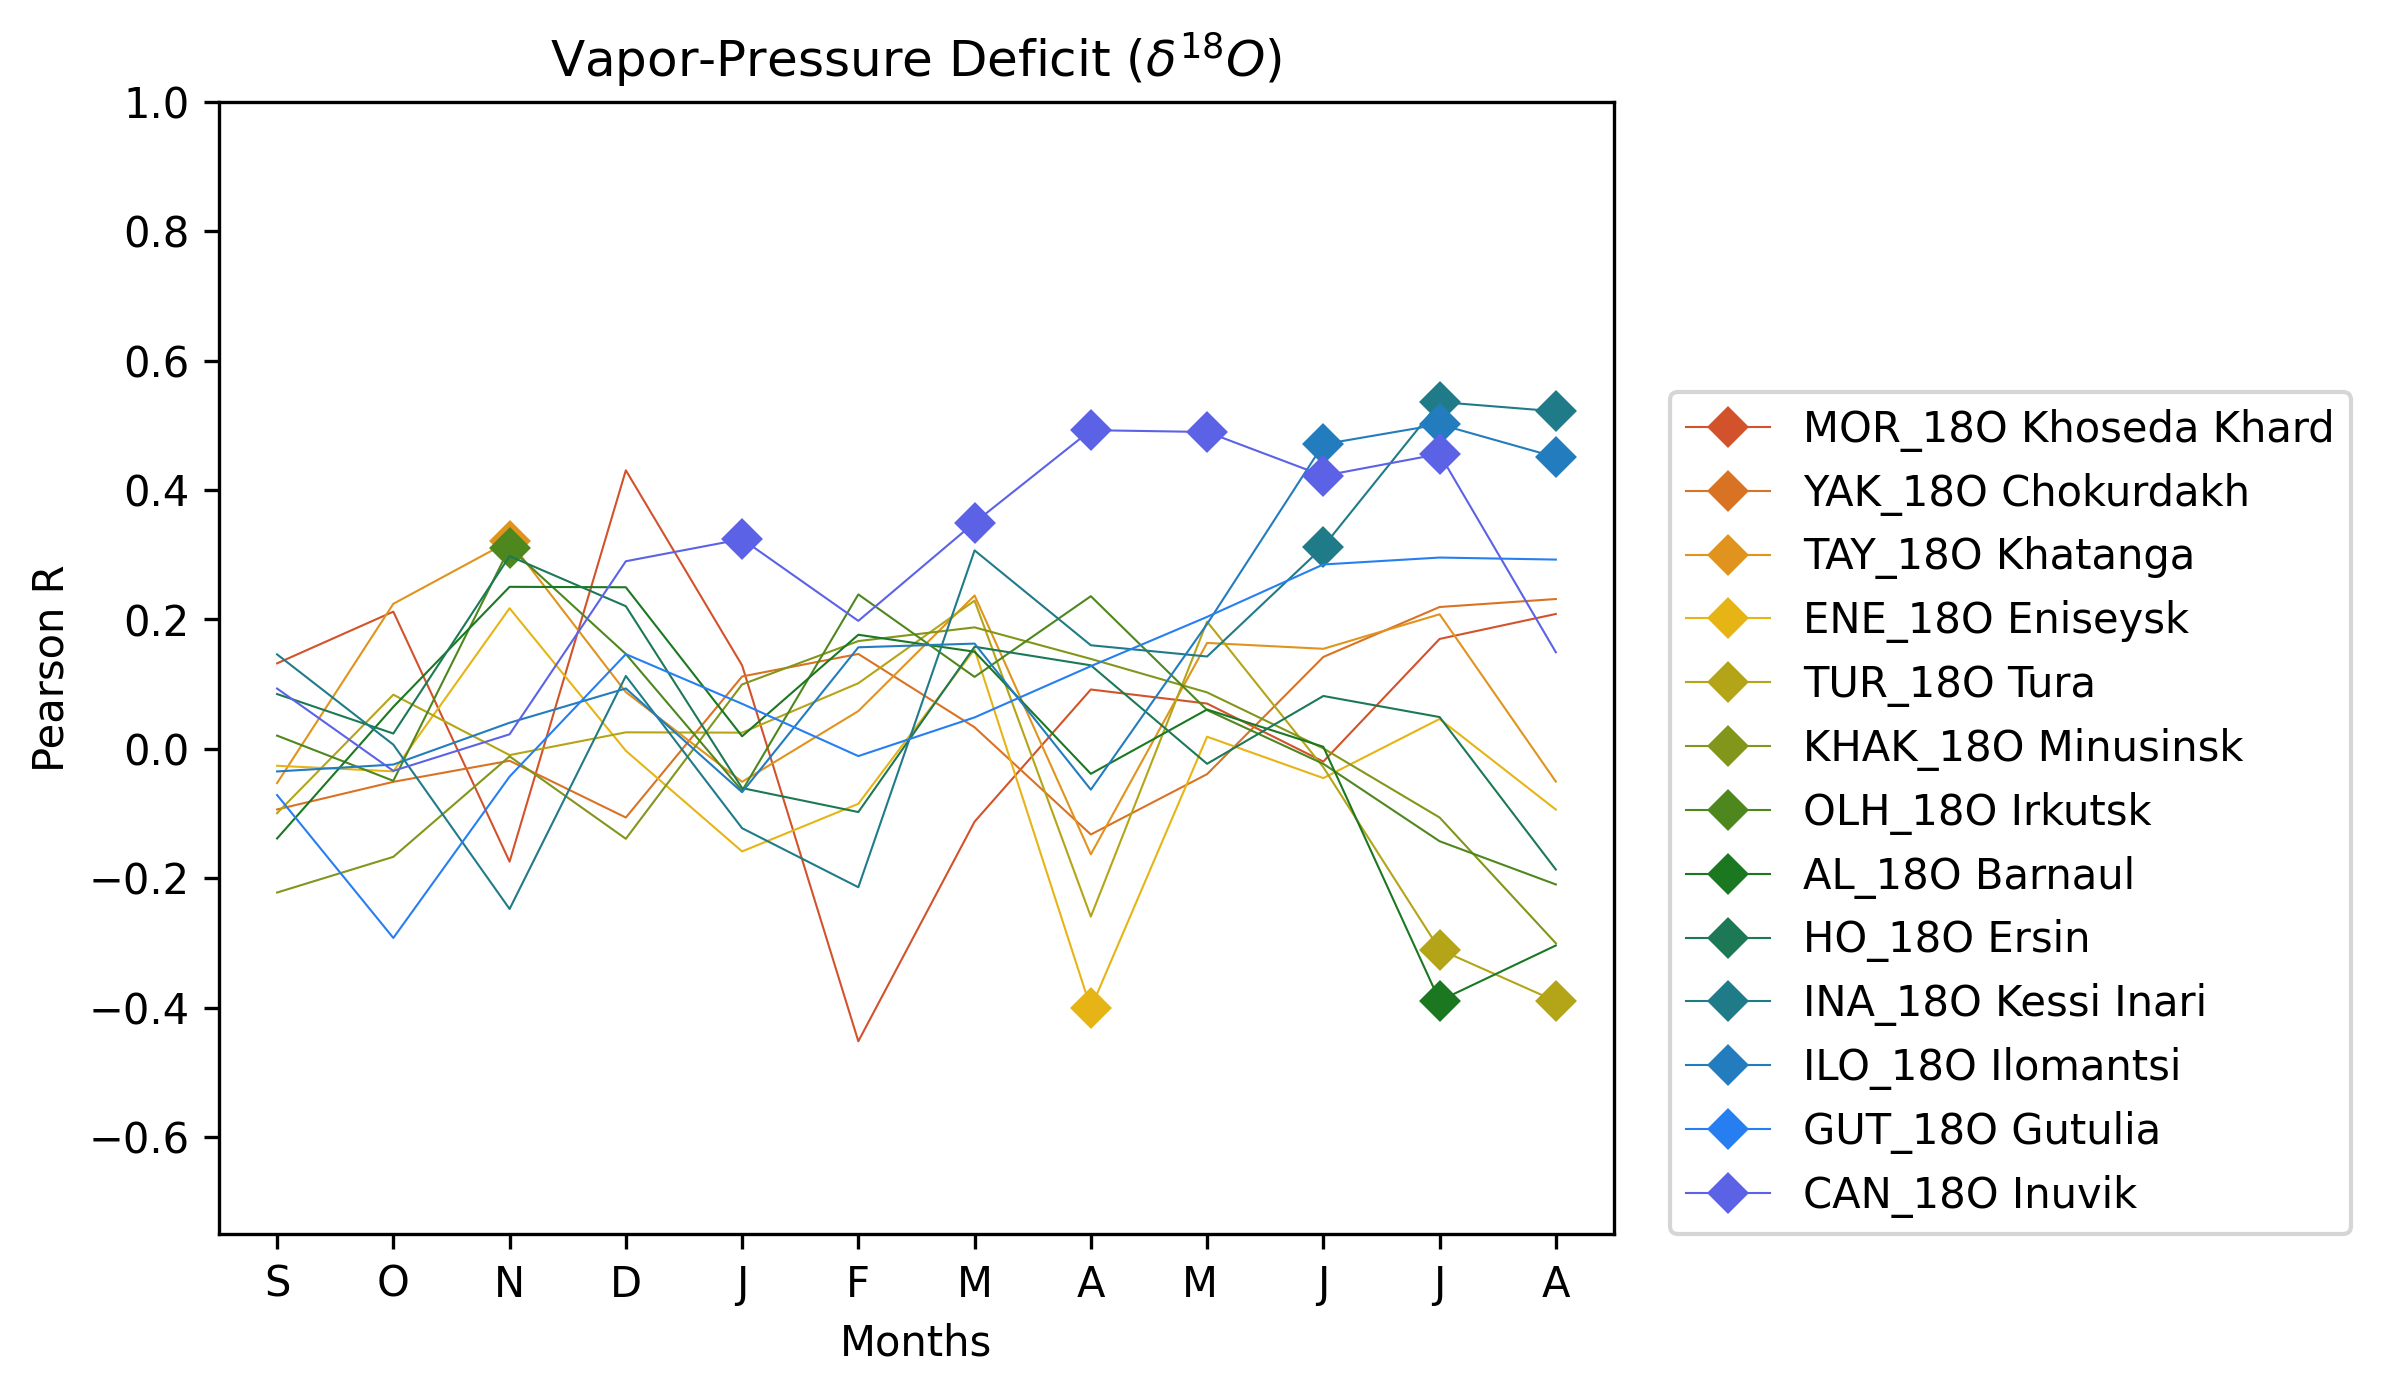

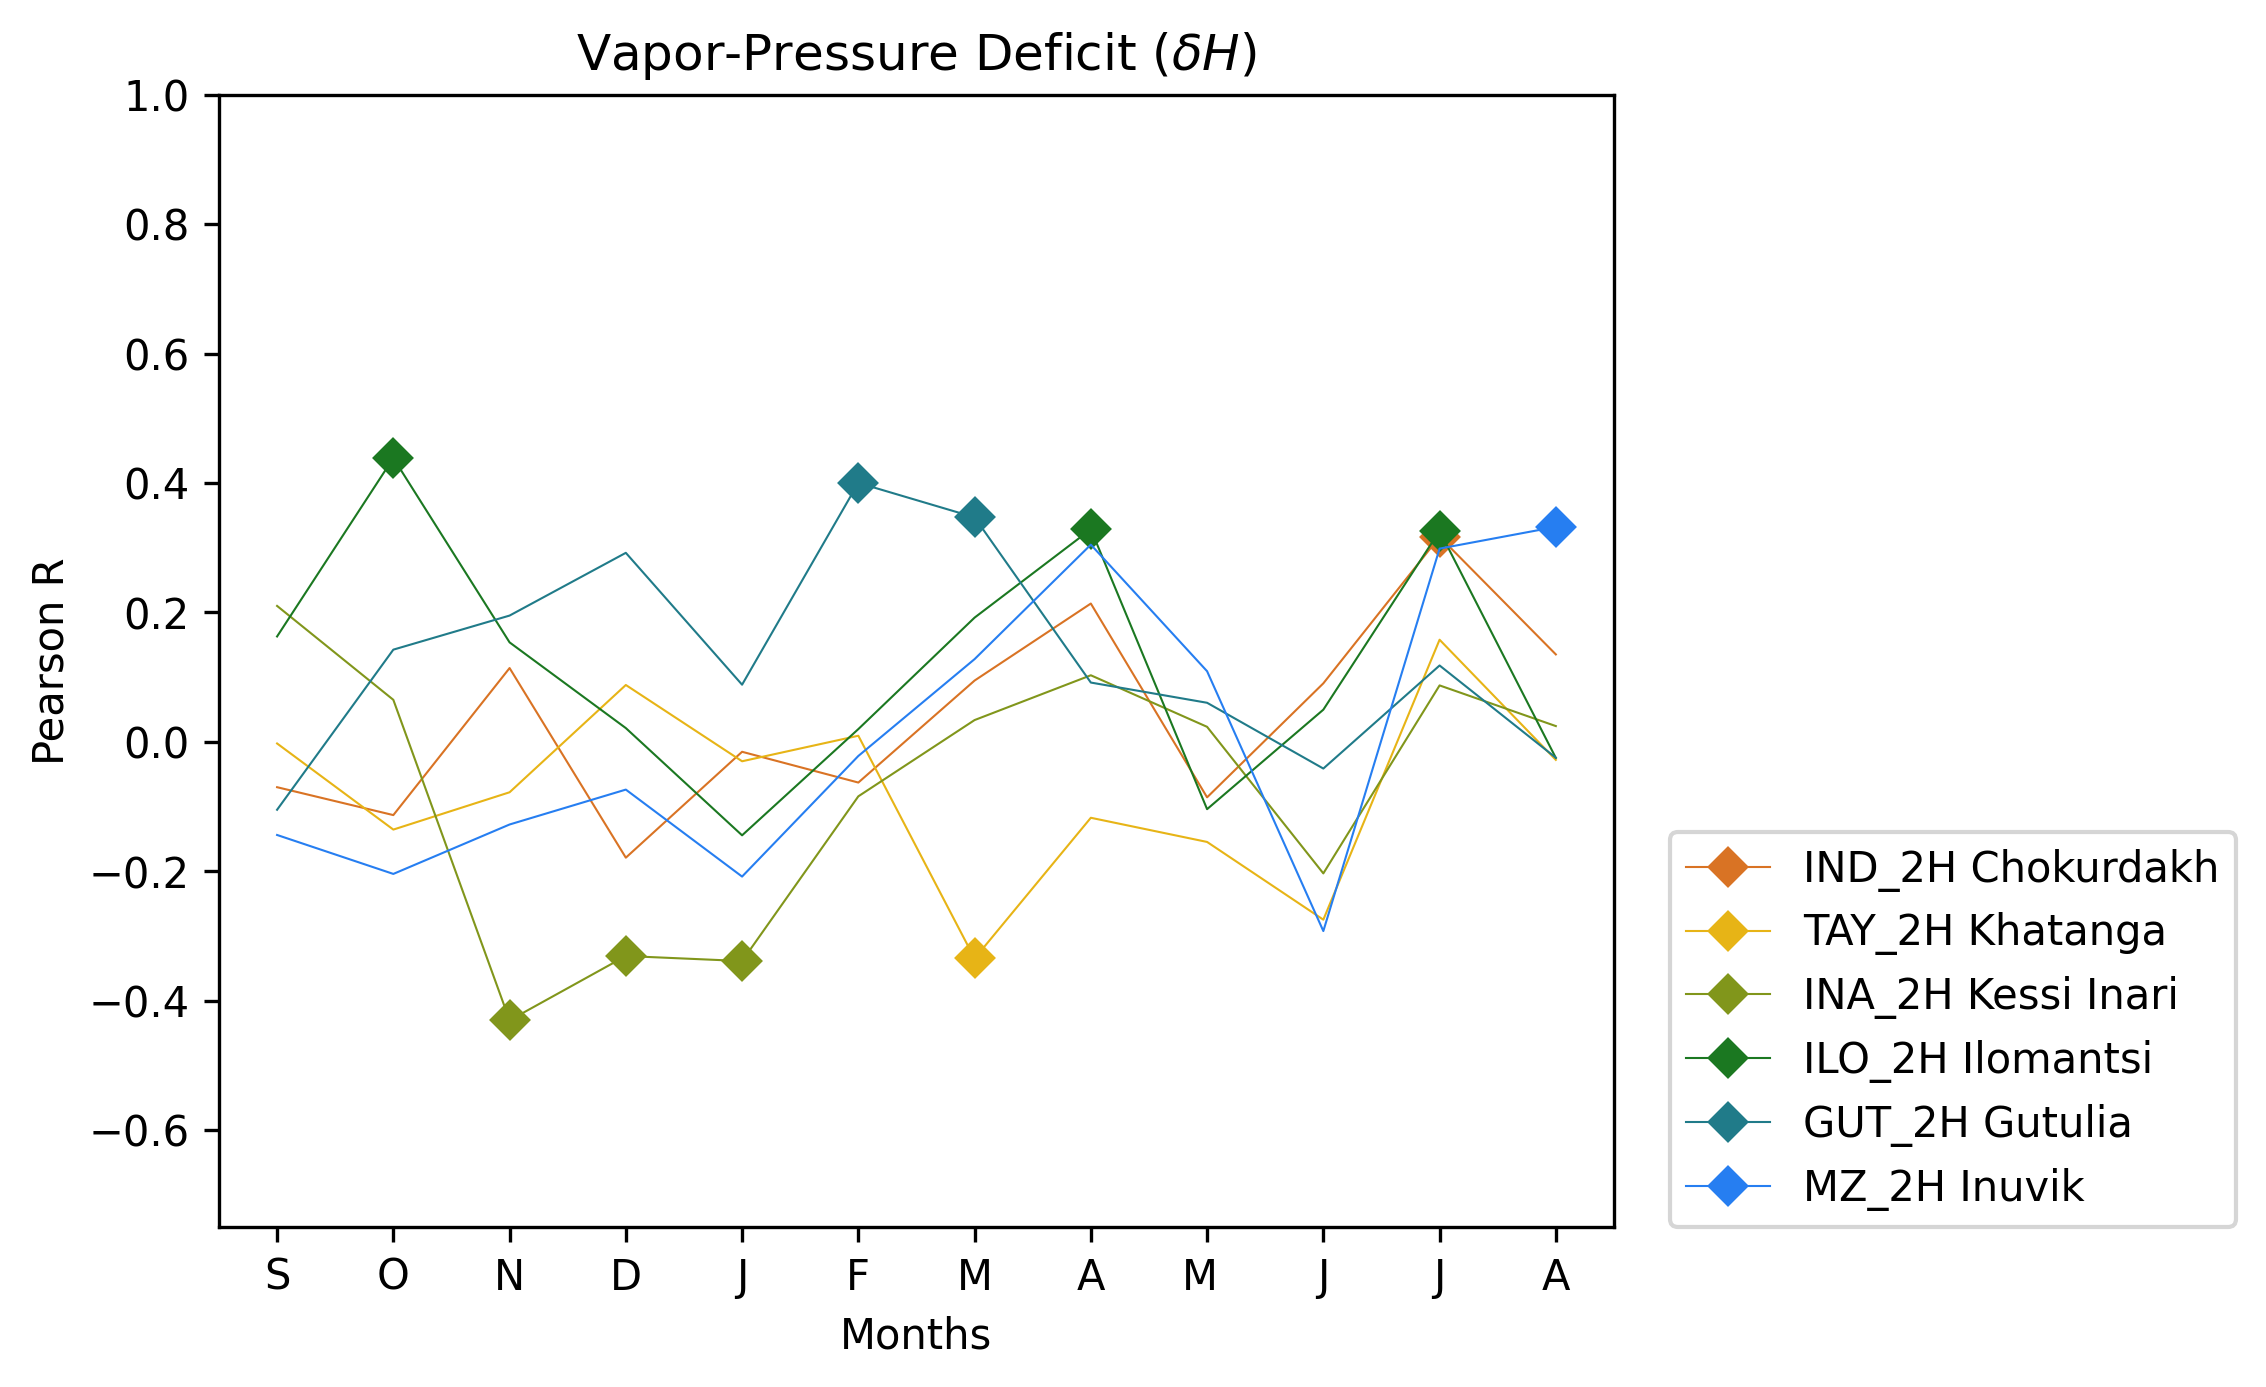

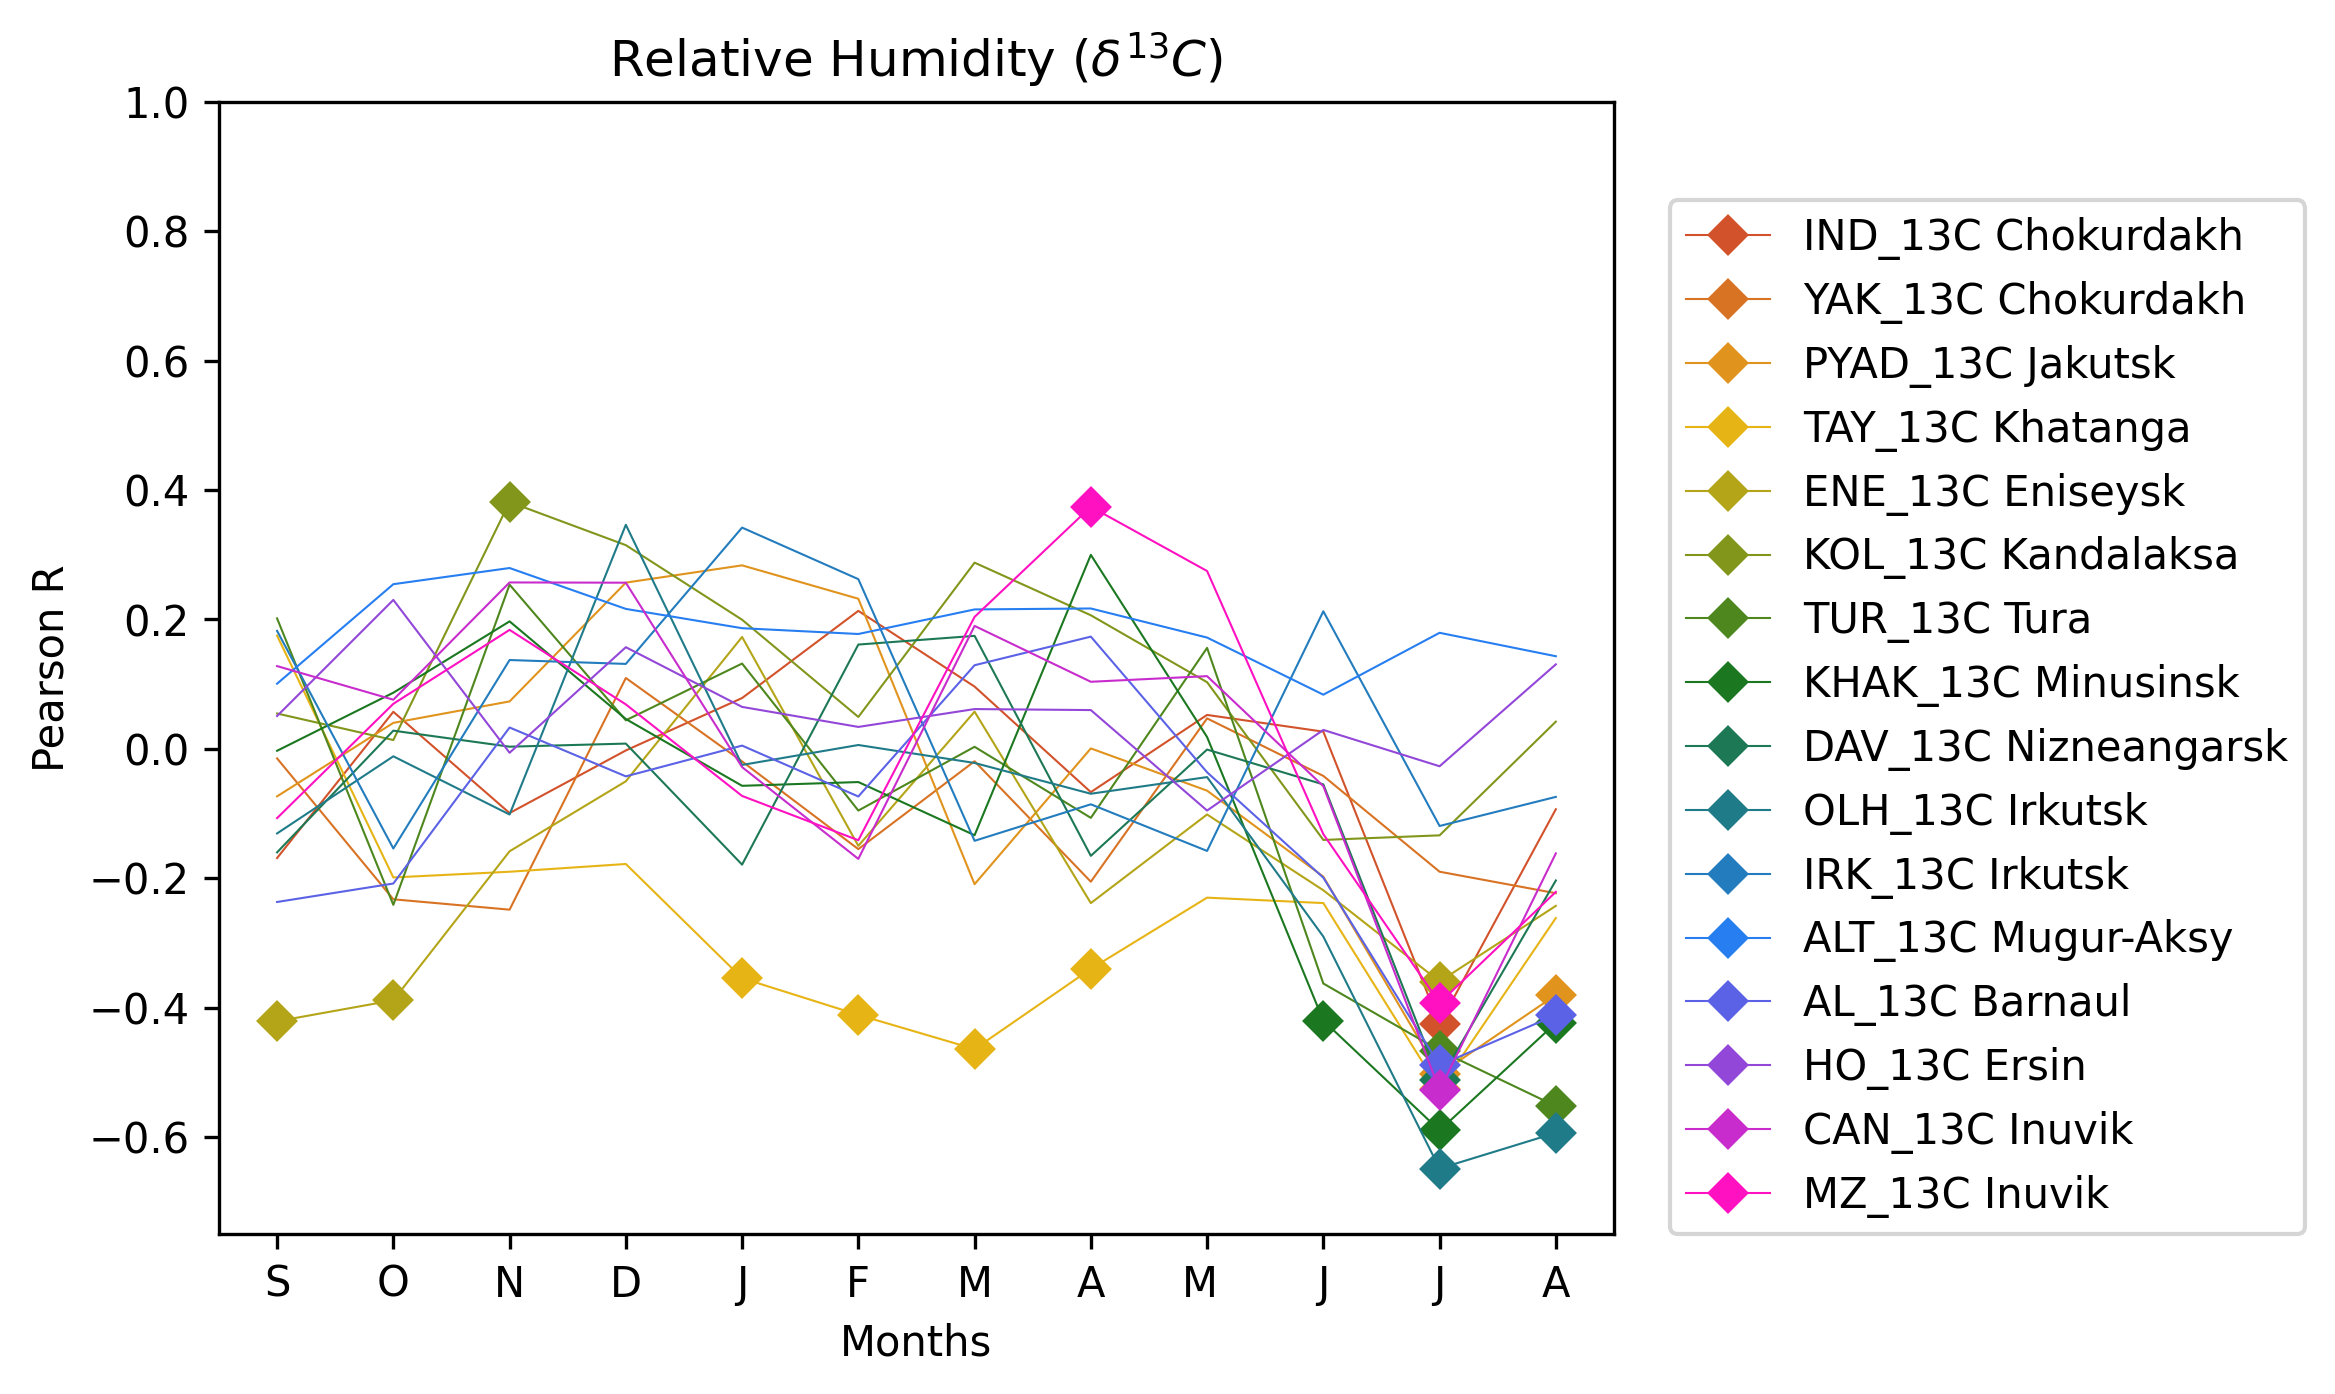

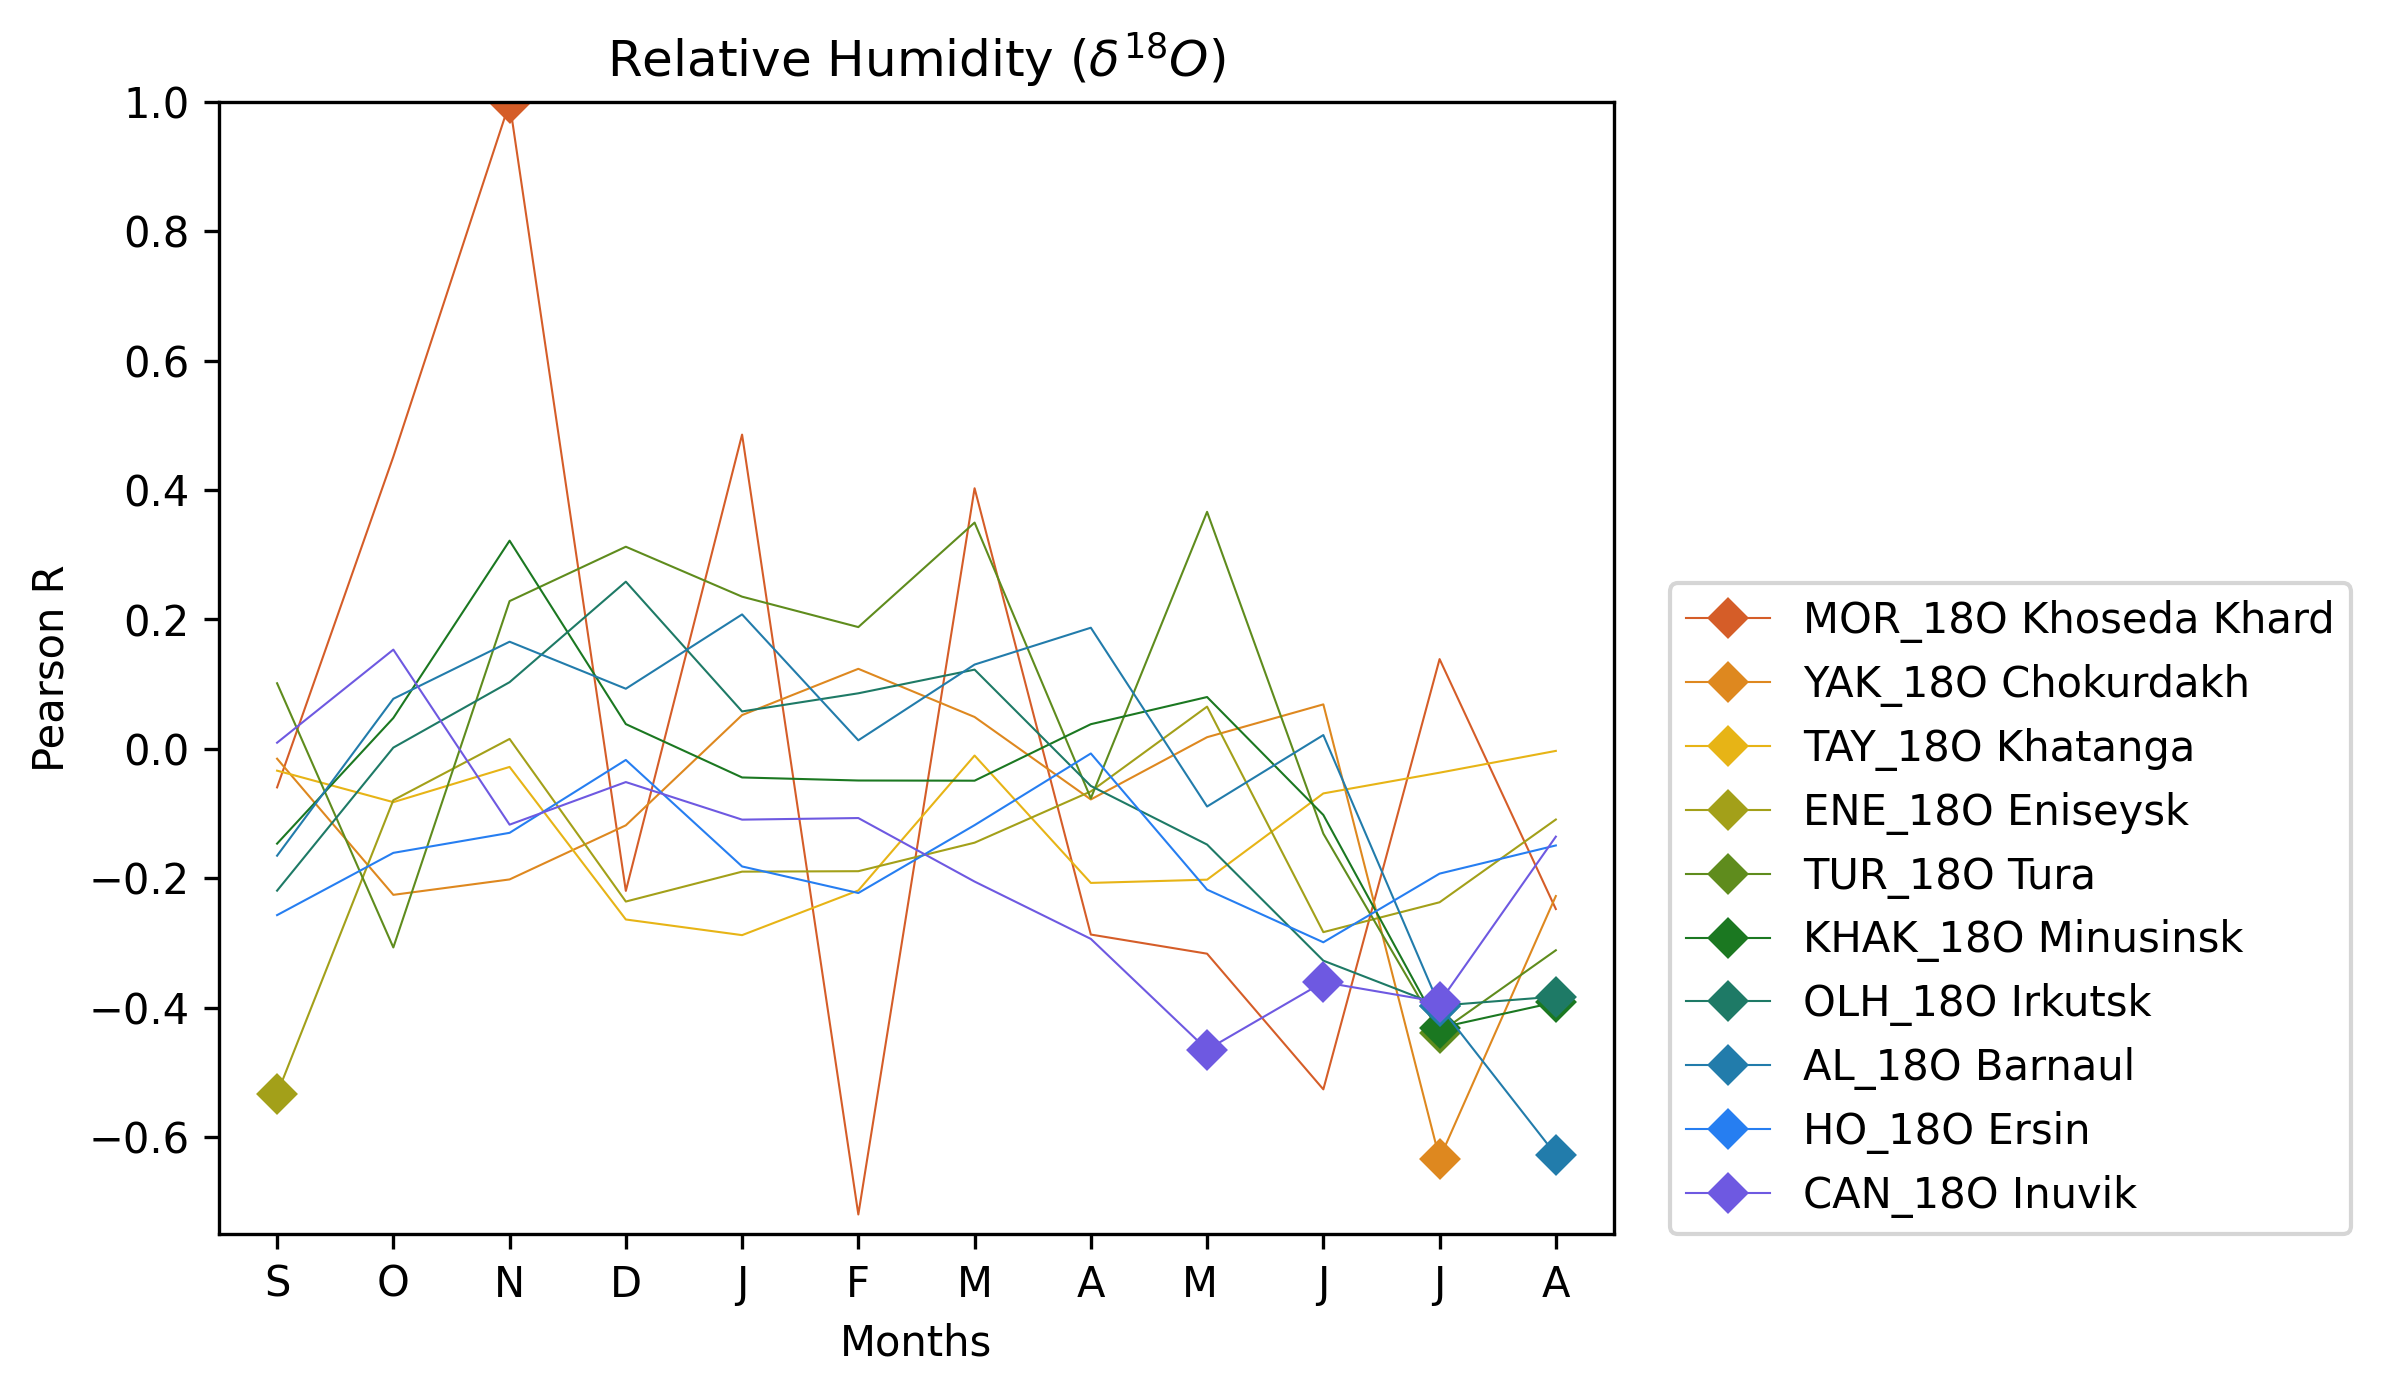

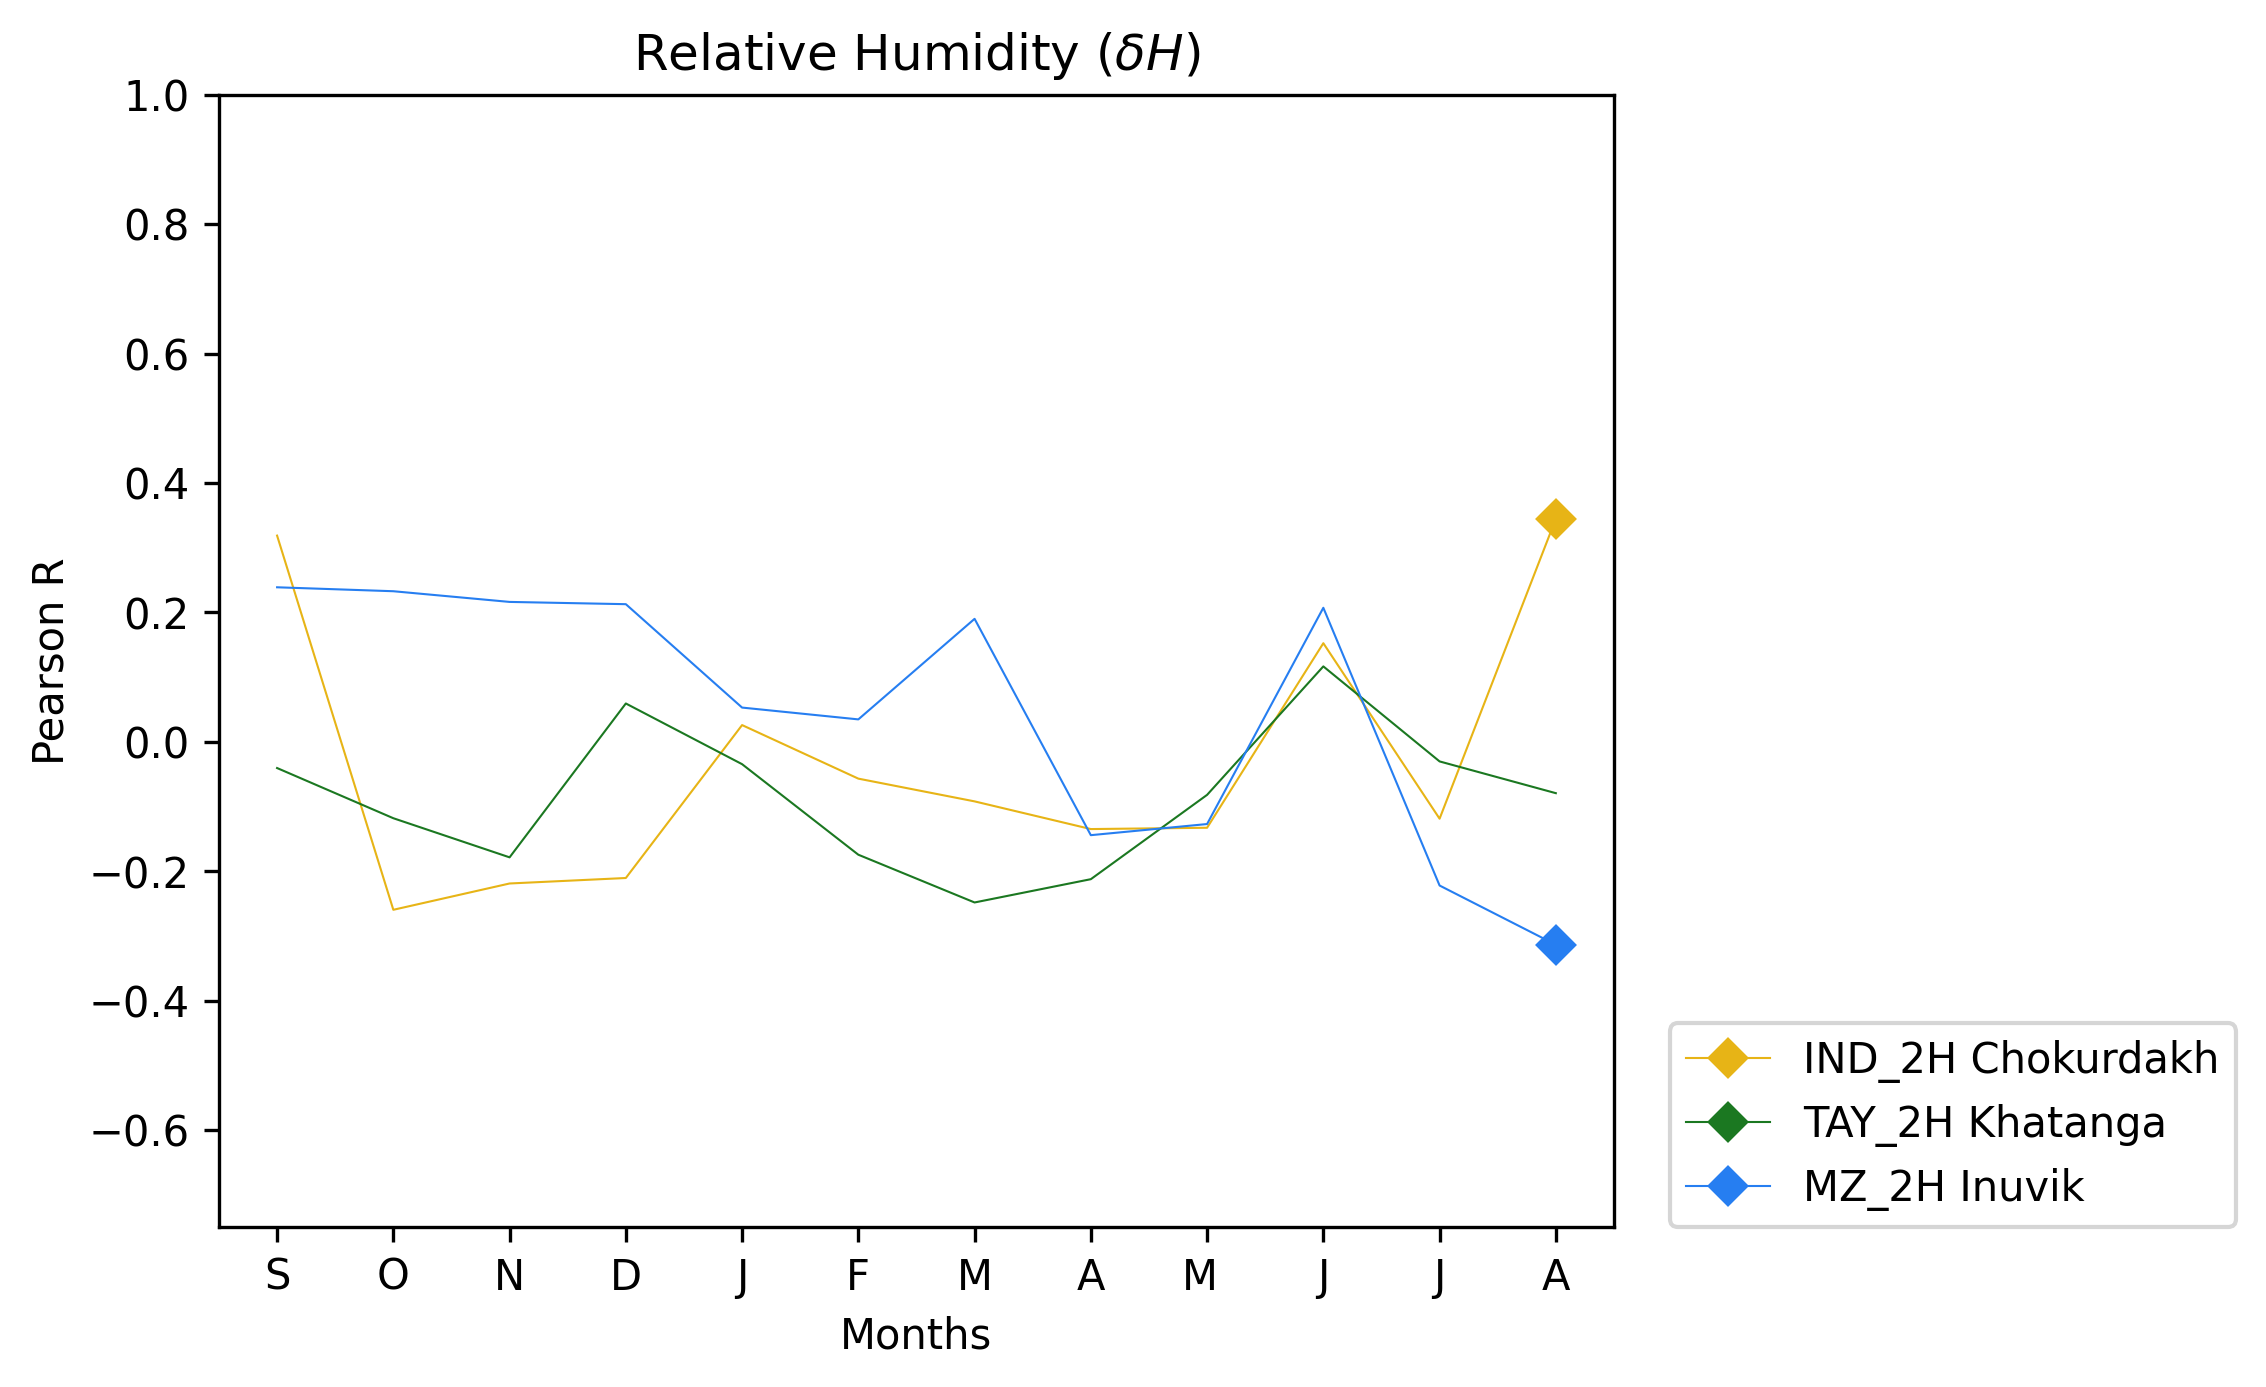

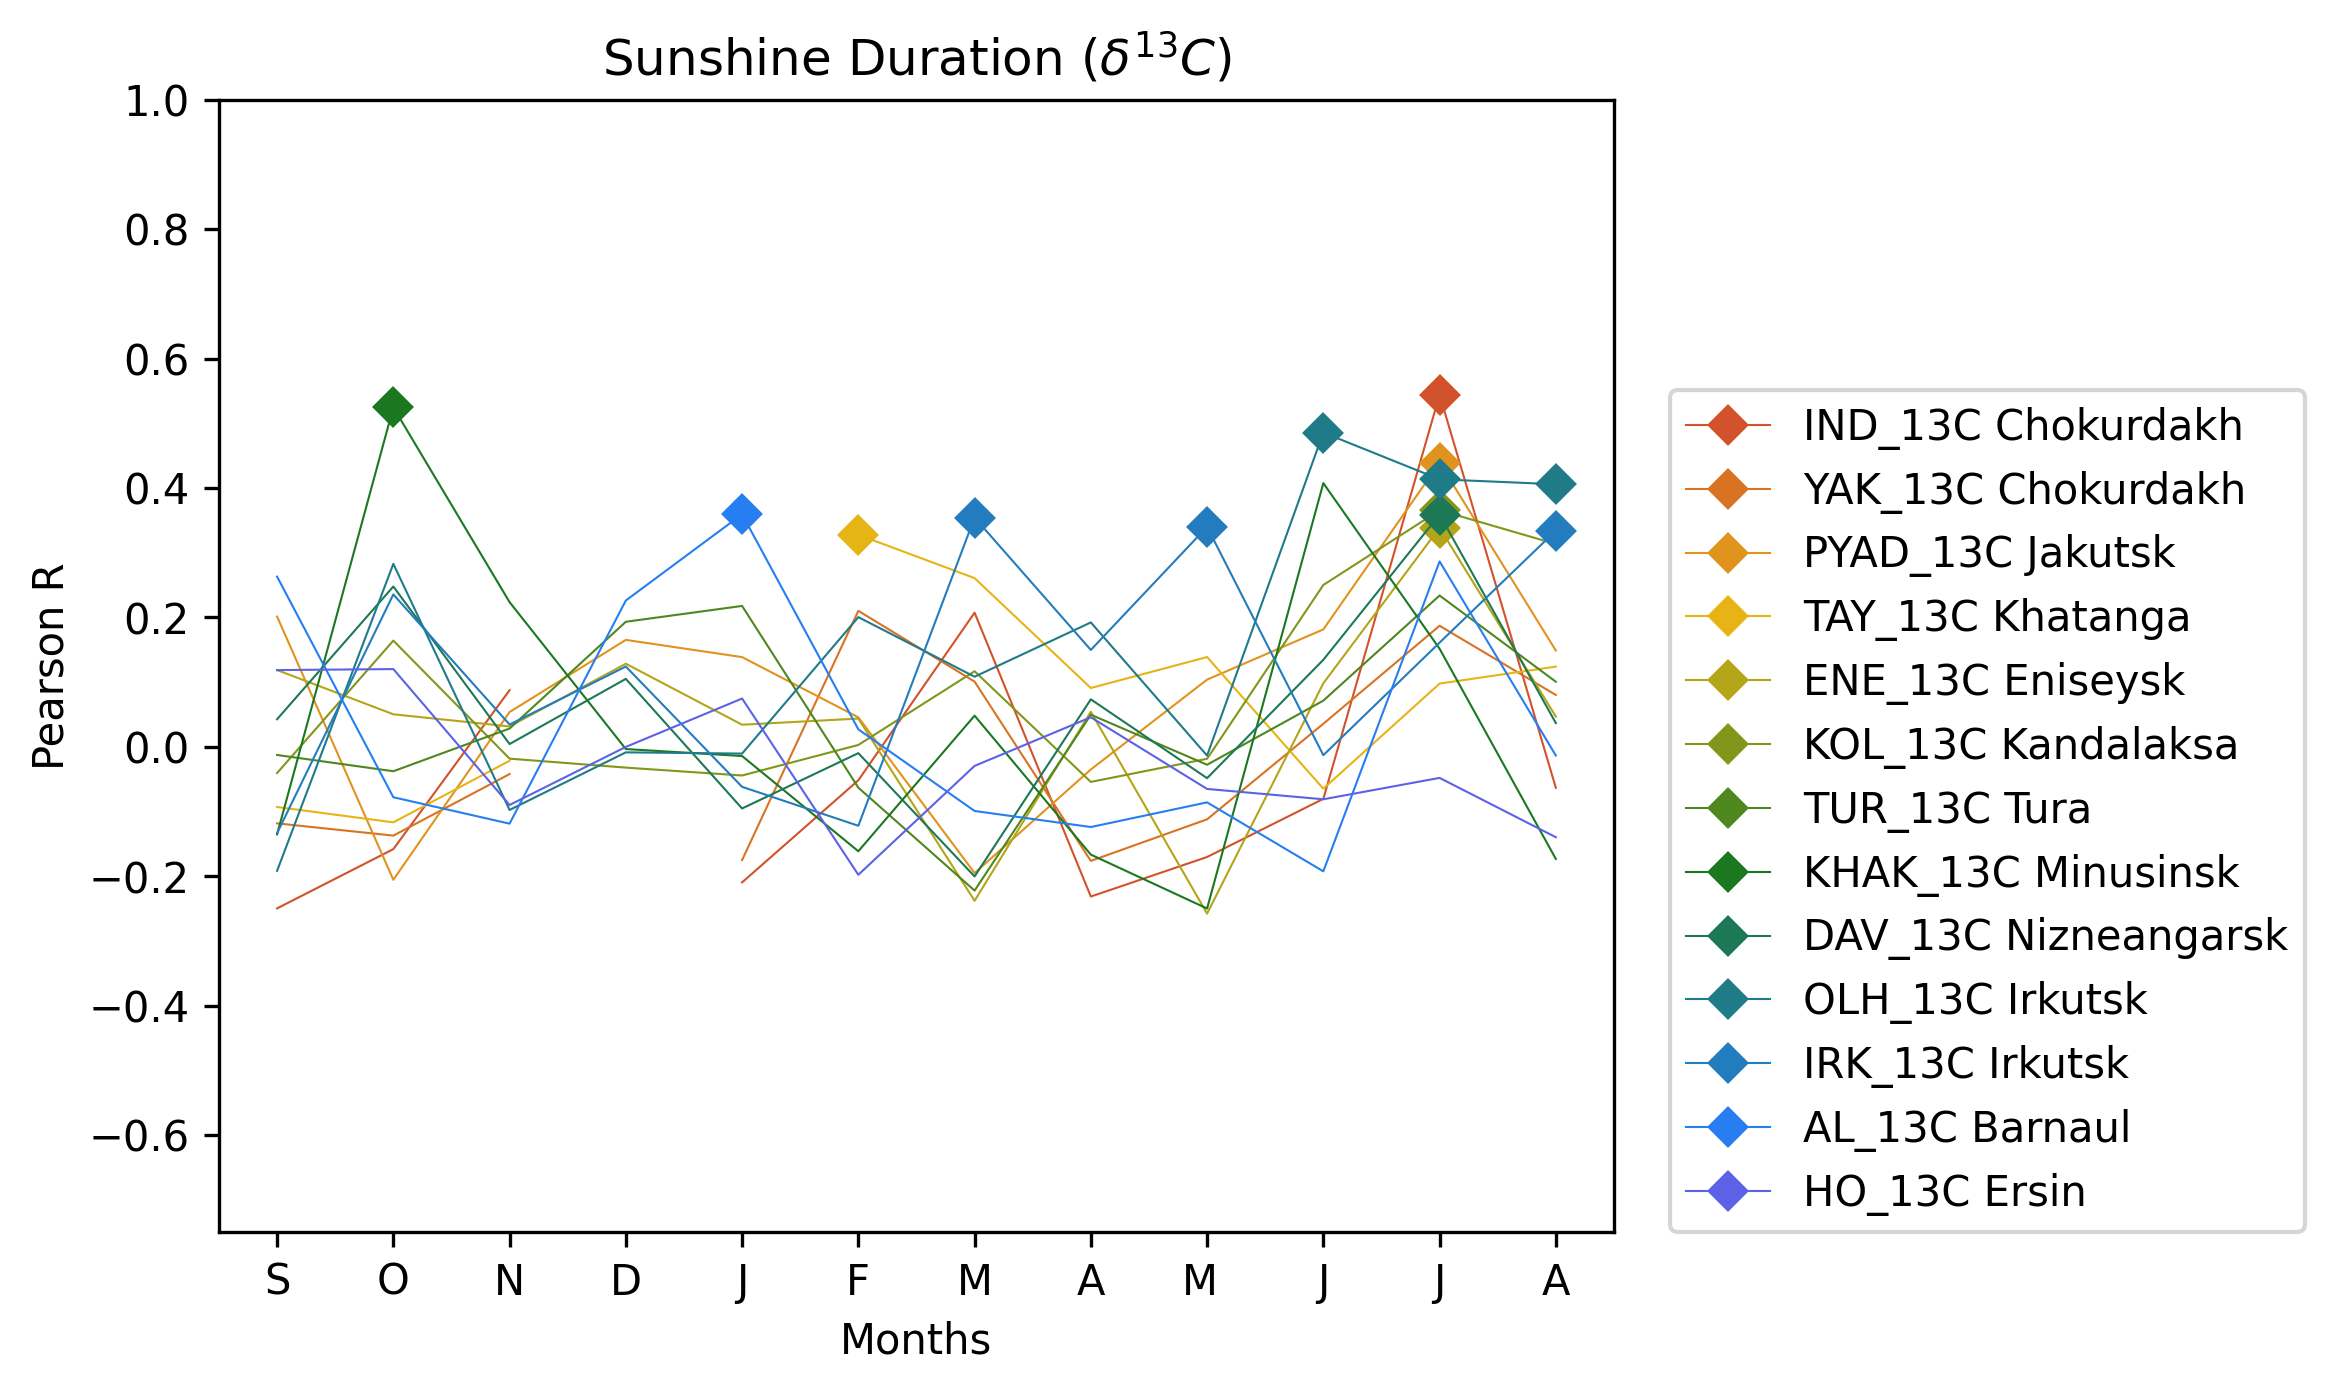

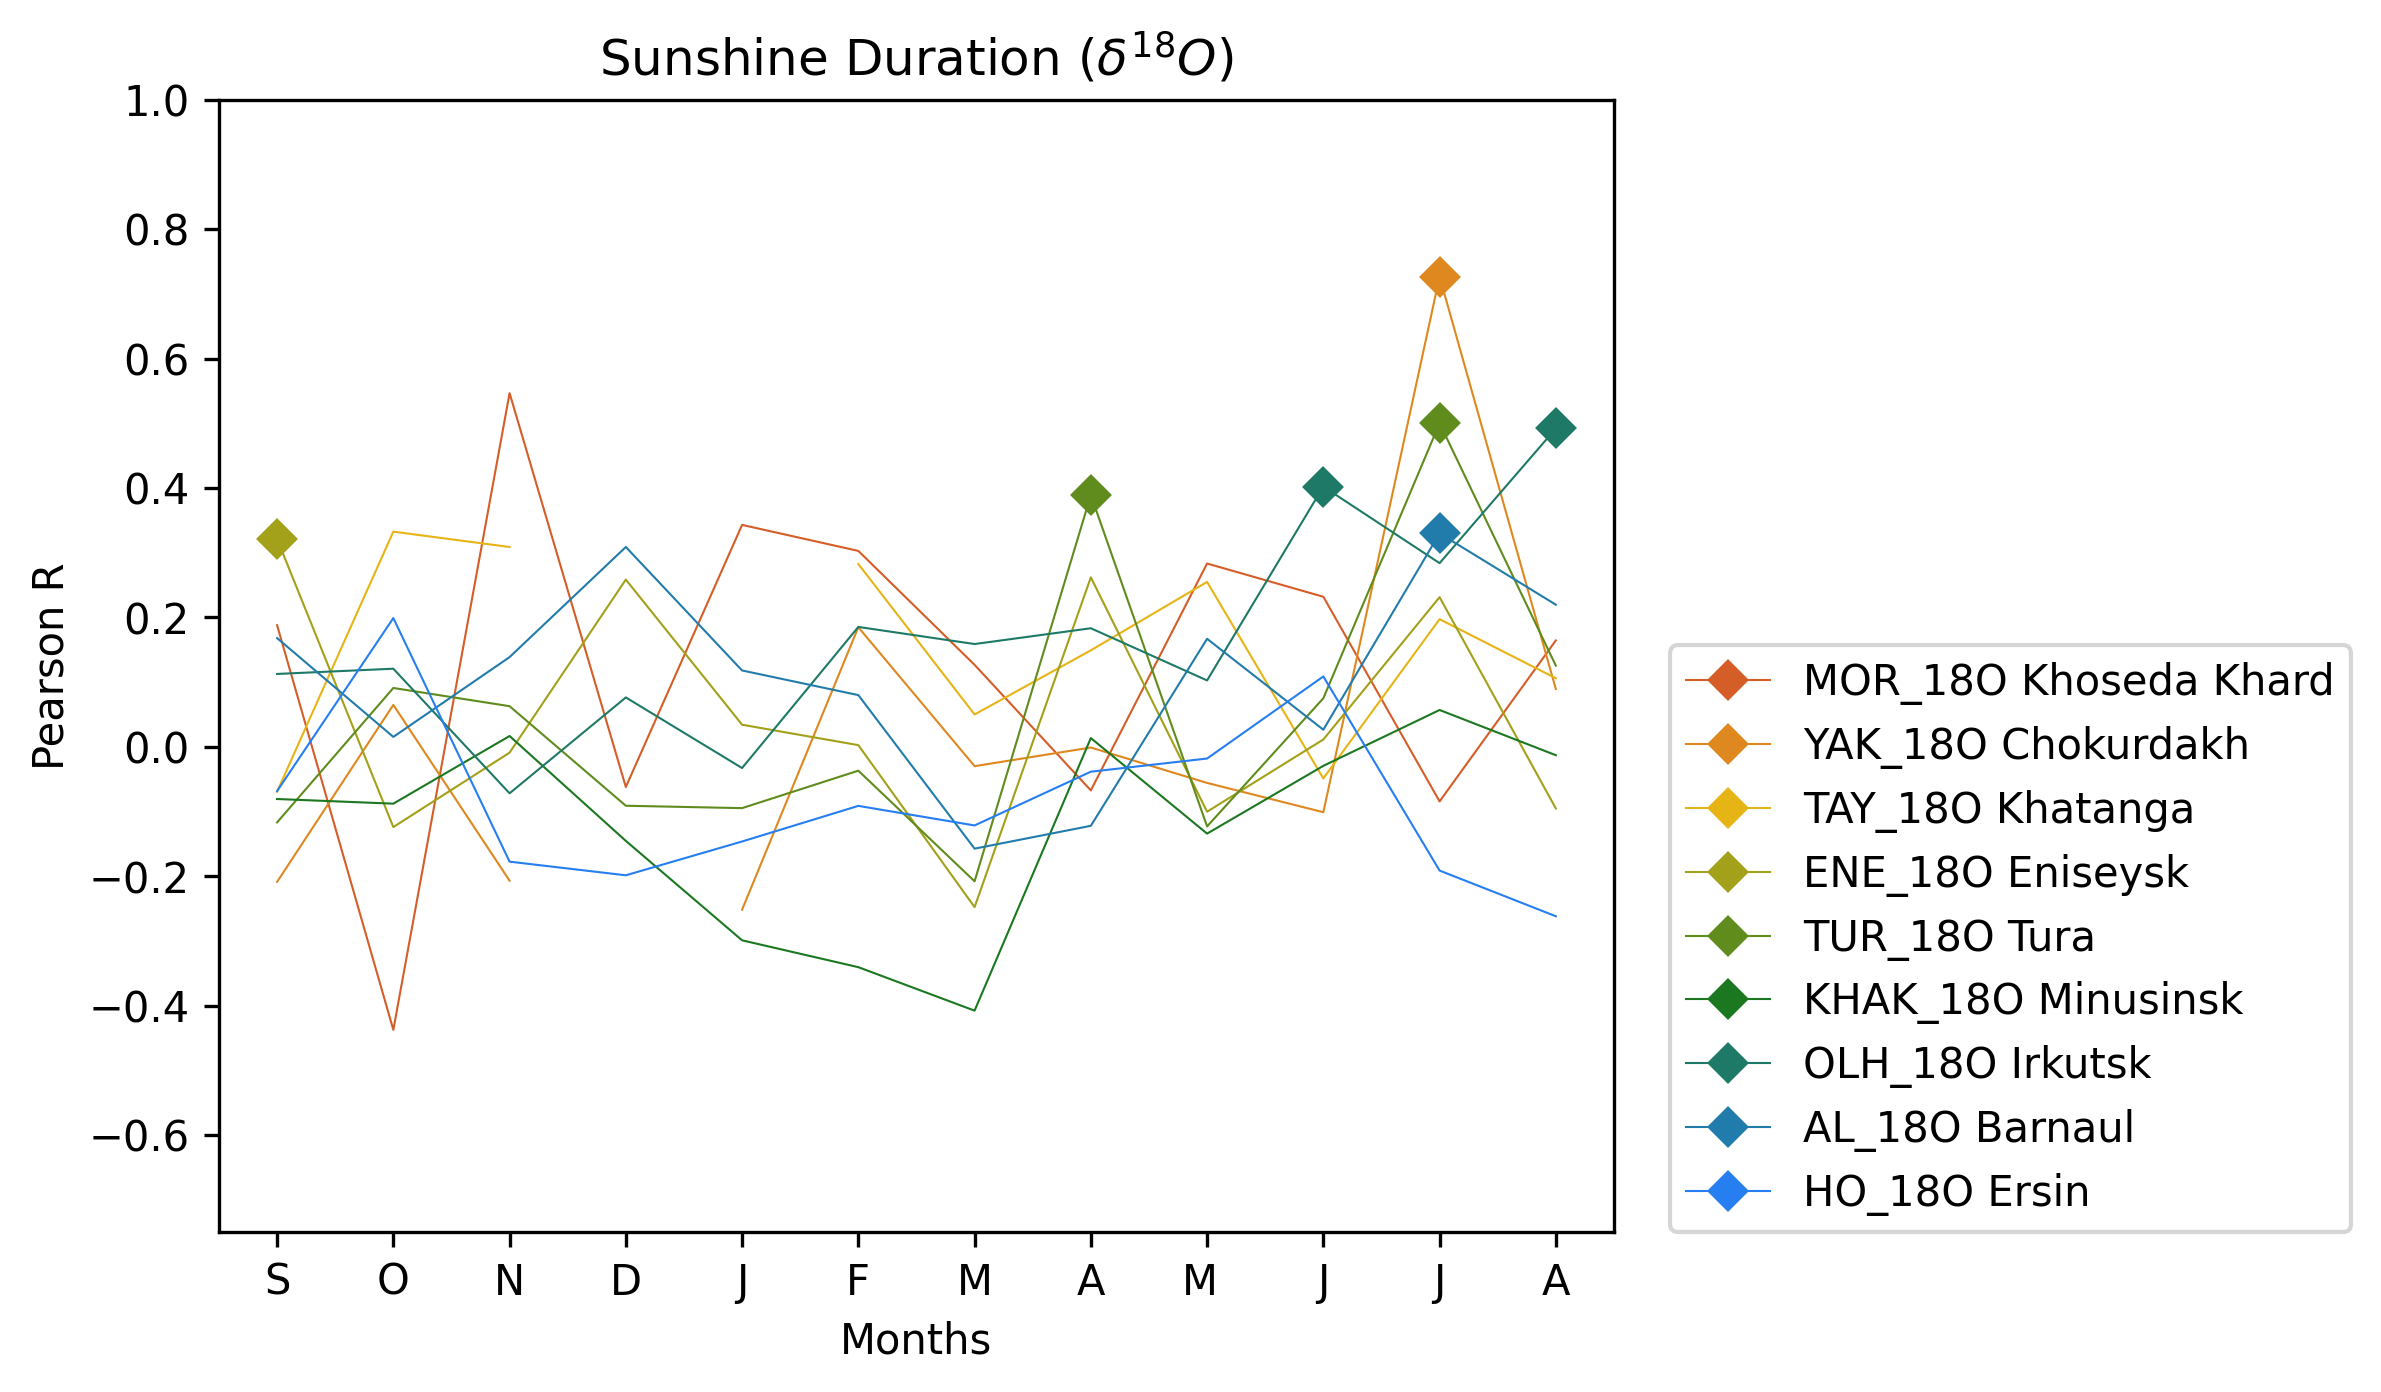

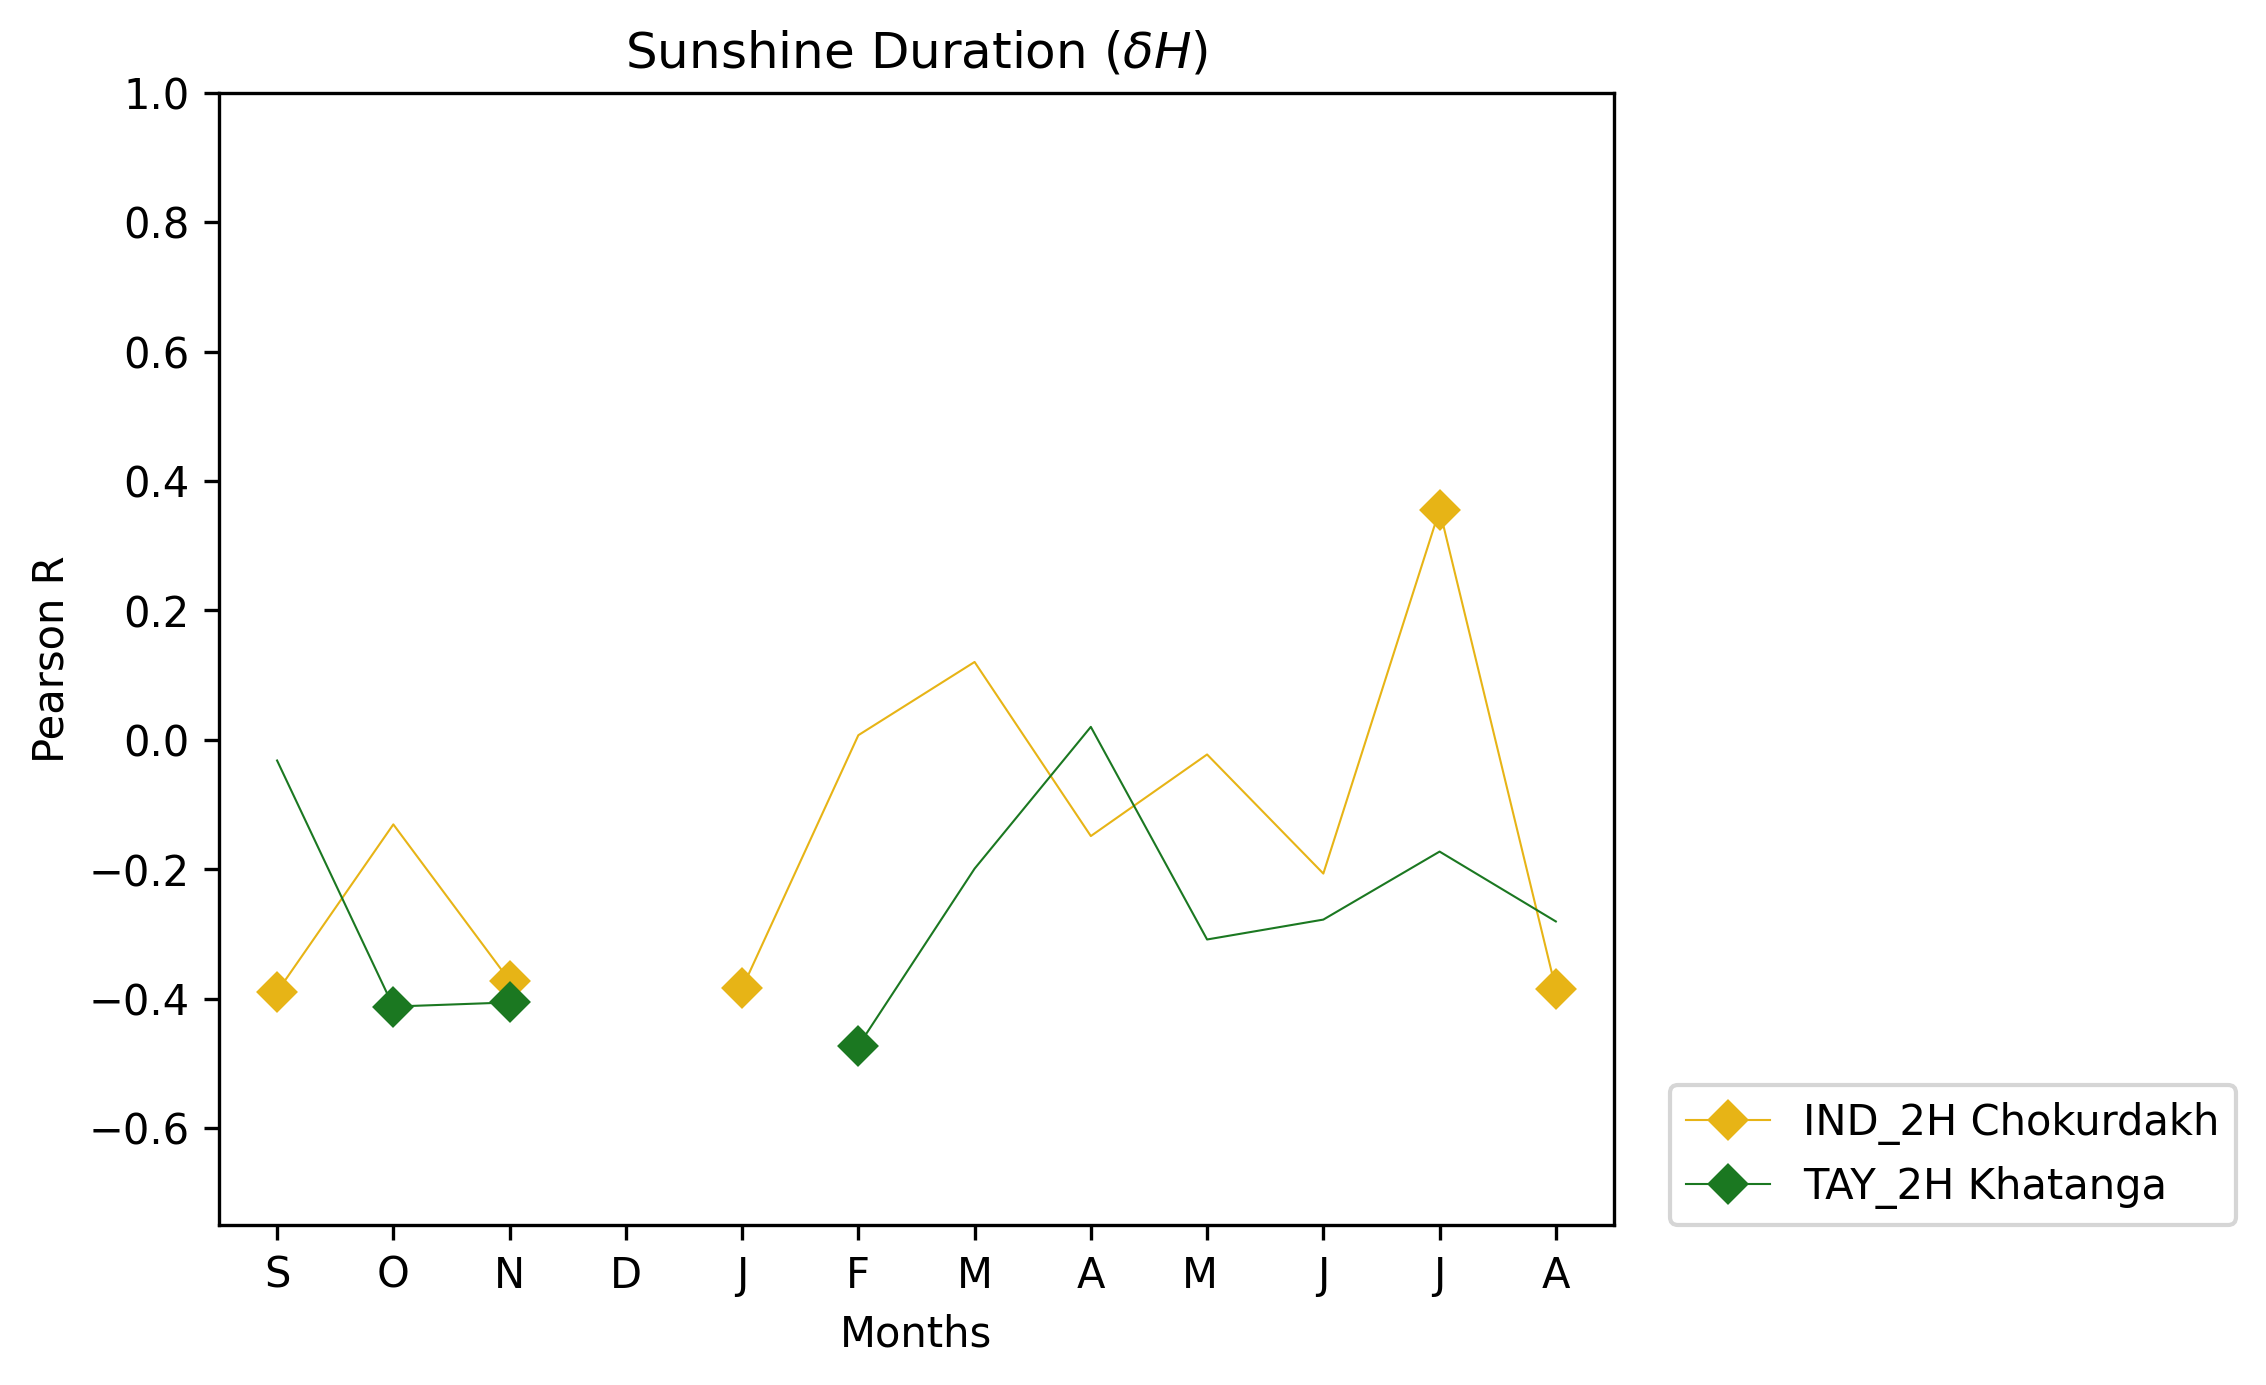

In [55]:
chars = ['Temp', 'Prec', 'VPD', 'RH', 'SD']
inds = ['13C', '18O', '2H']

for char in chars:
    for ind in inds:
        ax, fig = plot_multiple_coh_corr(r_values, p_values, char, ind)
        plt.plot()
        #plt.savefig(f'../output/to_send/{char}_{ind}.png', dpi=300)

In [40]:
coh_corr_to_table(r_values, p_values, data).T.style.applymap(highlight_significant_cells).to_excel(f'../output/trash/COH_corr_1960-2000.xlsx')

# Task 04.05.2022

In [5]:
COH_res = pd.read_excel('../input/COH/COH_zero-residual_040522.xlsx', sheet_name='resid')
COH_z = pd.read_excel('../input/COH/COH_zero-residual_040522.xlsx', sheet_name='zscore')

In [6]:
COH_res_after_1950 = COH_res[COH_res['Year']>1950]
COH_z_after_1950 = COH_z[COH_z['Year']>1950]

In [7]:
locs = ['Chokurdakh', 'Deputatsky', 'Khatanga']
regs = ['YAK', 'YAK', 'TAY']
dfs = {
    '1901-2021 residual': COH_res,
    '1951-2021 residual': COH_res_after_1950,
    '1901-2021 z-score': COH_z,
    '1951-2021 z-score': COH_z_after_1950,
    }

ind_titels = {
    '2H': '$δH$',
    '13C': '$δ^{13}C$',
    '18O': '$δ^{18}O$'
}

char_to_color = {
    'Temp': 'red',
    'Prec': 'blue',
    'VPD': 'green',
    'SD': 'orange',
    'RH': 'lightblue'
}

In [12]:
from climate.coh import get_coh_corr, coh_corr_to_table, plot_coh_corr

In [11]:
for df_key in dfs:
    r_values, p_values = get_coh_corr(data, dfs[df_key], locs, regs, ind_titels)
    plot_coh_corr(r_values, p_values, ind_titels, char_to_color, fig_savepath='../output/trash', years=df_key)
    

In [9]:
tables = dict()

for df_key in dfs:
    r_values, p_values = get_coh_corr(data, dfs[df_key], locs, regs, ind_titels)
    tables[df_key] = coh_corr_to_table(r_values, p_values, data)

C:\Users\Mikhail\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [13]:
for df_key in dfs:
    tables[df_key].T.style.applymap(highlight_significant_cells).to_excel(f'../output/trash/{df_key}.xlsx')